# BFSI Case Study

## Problem Statement

Develop an internal credit risk scoring model for Home Credit by leveraging applicant-level information from loan applications and aggregated trade-level data from credit bureaus. The goal is to classify loan applicants into approvals and rejections based on their past payment behavior and application details, enabling Home Credit to make informed lending decisions while balancing risk and customer acquisition.
Key challenges include:
1. Aggregating trade-level data to the applicant level to capture credit behavior.
2. Identifying key factors influencing loan repayment behavior.
3. Building a classification model to distinguish between approved and rejected applicants.
4. Translating model outputs into business strategies for risk management and loan decisioning.

## Objectives

- Data Collection & cleaning
- Feature Engineering
- Exploratory Data Analysis (EDA)
- Model Development
- Identification of Key Factors
- Model Interpretation & Business Strategy
- Implementation & Decision making

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
path = os.chdir(r"C:\Users\josev\Downloads\BA case study III + BFSI")
os.getcwd()

'C:\\Users\\josev\\Downloads\\BA case study III + BFSI'

In [3]:
# importing application_base data set
df1 = pd.read_csv("applications_base.csv")
pd.set_option('display.max_columns',None)
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
df1.shape

(307511, 122)

In [5]:
# importing bureau data set
df2 = pd.read_csv("bureau.csv")
df2.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [6]:
df2.shape

(1716428, 17)

### Joining Two data Frames

In [7]:
# joining two data sets df1 and df2
df_joined = pd.merge(df1,df2, on = 'SK_ID_CURR',how = 'inner')
df_joined.shape

(1465325, 138)

In [8]:
df_joined.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100002       1         Cash loans           M            N   
2      100002       1         Cash loans           M            N   
3      100002       1         Cash loans           M            N   
4      100002       1         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_x  \
0               Y             0          202500.0    406597.5        24700.5   
1               Y             0          202500.0    406597.5        24700.5   
2               Y             0          202500.0    406597.5        24700.5   
3               Y             0          202500.0    406597.5        24700.5   
4               Y             0          202500.0    406597.5        24700.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1         351000.0   Unaccompanied          Working   
2         351000.0   Unaccompanied          Working   
3         351000.0   Unaccompanied          Working   
4         351000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.018801       -9461           -637            -3648.0   
2                    0.018801       -9461           -637            -3648.0   
3                    0.018801       -9461           -637            -3648.0   
4                    0.018801       -9461           -637            -3648.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1            -2120          NaN           1               1                0   
2            -2120          NaN           1               1                0   
3            -2120          NaN           1               1                0   
4            -2120          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0        Laborers              1.0   
2                 1           1           0        Laborers              1.0   
3                 1           1           0        Laborers              1.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     2                            2   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                  WEDNESDAY                       10   
2                  WEDNESDAY                       10   
3                  WEDNESDAY                       10   
4                  WEDNESDAY                       10   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2            

## Handling Null Values

In [9]:
# df1 null counts of columns
nulls = []
for i in df_joined.columns:
    if df_joined[i].isna().sum():
        nulls.append(i)
    null_percent = (df_joined.isnull().sum()/df_joined.shape[0])*100
for col in nulls:
    print(f"{col} contains {null_percent[col]:.2f}% missing values.")

AMT_ANNUITY_x contains 0.00% missing values.
AMT_GOODS_PRICE contains 0.08% missing values.
NAME_TYPE_SUITE contains 0.39% missing values.
OWN_CAR_AGE contains 63.72% missing values.
OCCUPATION_TYPE contains 31.10% missing values.
CNT_FAM_MEMBERS contains 0.00% missing values.
EXT_SOURCE_1 contains 53.46% missing values.
EXT_SOURCE_2 contains 0.16% missing values.
EXT_SOURCE_3 contains 3.07% missing values.
APARTMENTS_AVG contains 48.26% missing values.
BASEMENTAREA_AVG contains 56.18% missing values.
YEARS_BEGINEXPLUATATION_AVG contains 46.21% missing values.
YEARS_BUILD_AVG contains 64.57% missing values.
COMMONAREA_AVG contains 68.09% missing values.
ELEVATORS_AVG contains 50.82% missing values.
ENTRANCES_AVG contains 47.76% missing values.
FLOORSMAX_AVG contains 47.19% missing values.
FLOORSMIN_AVG contains 66.04% missing values.
LANDAREA_AVG contains 57.05% missing values.
LIVINGAPARTMENTS_AVG contains 66.53% missing values.
LIVINGAREA_AVG contains 47.63% missing values.
NONLIVING

In [10]:
# List out High Null columns above 30% null values
high_null_colums = []
for i in df_joined.columns:
    if (df_joined[i].isnull().sum()/df_joined.shape[0])*100 > 30:
        high_null_colums.append(i)
len(high_null_colums)

54

#### Dropping High Null Columns

In [11]:
df_joined.drop(columns = high_null_colums,inplace=True)
df_joined.shape

(1465325, 84)

In [12]:
# null counts of the remaing columns
nulls = []
for i in df_joined.columns:
    if df_joined[i].isna().sum():
        nulls.append(i)
    null_percent = (df_joined.isnull().sum()/df_joined.shape[0])*100
for col in nulls:
    print(f"{col} contains {null_percent[col]:.2f}% missing values.")

AMT_ANNUITY_x contains 0.00% missing values.
AMT_GOODS_PRICE contains 0.08% missing values.
NAME_TYPE_SUITE contains 0.39% missing values.
CNT_FAM_MEMBERS contains 0.00% missing values.
EXT_SOURCE_2 contains 0.16% missing values.
EXT_SOURCE_3 contains 3.07% missing values.
OBS_30_CNT_SOCIAL_CIRCLE contains 0.27% missing values.
DEF_30_CNT_SOCIAL_CIRCLE contains 0.27% missing values.
OBS_60_CNT_SOCIAL_CIRCLE contains 0.27% missing values.
DEF_60_CNT_SOCIAL_CIRCLE contains 0.27% missing values.
DAYS_CREDIT_ENDDATE contains 6.08% missing values.
AMT_CREDIT_SUM contains 0.00% missing values.
AMT_CREDIT_SUM_DEBT contains 15.22% missing values.


### Missing Value Imputation`m

In [13]:
from sklearn.impute import SimpleImputer
median_imputation = SimpleImputer(strategy='median')
mode_imputation = SimpleImputer(strategy='most_frequent')
cat_cols = [i for i in df_joined[nulls].select_dtypes(include='object').columns]
num_cols = [i for i in df_joined[nulls].select_dtypes(include=['float64','int64']).columns]
for i in cat_cols:
    df_joined[cat_cols] = mode_imputation.fit_transform(df_joined[cat_cols])
for j in num_cols:
    df_joined[num_cols] = median_imputation.fit_transform(df_joined[num_cols])

In [14]:
# null counts of the remaing columns
nulls = []
for i in df_joined.columns:
    if df_joined[i].isna().sum():
        nulls.append(i)
    null_percent = (df_joined.isnull().sum()/df_joined.shape[0])*100
for col in nulls:
    print(f"{col} contains {null_percent[col]:.2f}% missing values.")

## FEATURE ENGINEERING

In [15]:
# new feature NUM_TRADES_REPORTED
trade_counts = df_joined.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()
df_joined['NUM_TRADES_REPORTED'] = df_joined['SK_ID_CURR'].map(trade_counts)

pd.options.display.float_format = '{:.2f}'.format
df_joined['NUM_TRADES_REPORTED'].describe()

count   1465325.00
mean          9.01
std           5.90
min           1.00
25%           5.00
50%           8.00
75%          12.00
max         116.00
Name: NUM_TRADES_REPORTED, dtype: float64

In [16]:
# new_feature NUM_CLOSED_TRADES
closed_trades = df_joined.groupby('SK_ID_CURR')['CREDIT_ACTIVE'].count()
df_joined['NUM_CLOSED_TRADES'] = df_joined['SK_ID_CURR'].map(closed_trades)

In [17]:
# new_feature 'MAX_CREDITDAY_OVERDUE'
max_credit_overdue = df_joined.groupby('SK_ID_CURR')['CREDIT_DAY_OVERDUE'].max()
df_joined['MAX_CREDITDAY_OVERDUE'] =  df_joined['SK_ID_CURR'].map(max_credit_overdue)

In [18]:
## new_feature 'MOST_FREQUENT_CURRENCY'
most_frequent_currency = (df_joined.groupby('SK_ID_CURR')['CREDIT_CURRENCY'].apply(lambda x: x.value_counts().idxmax()).reset_index())

most_frequent_currency.rename(columns={'CREDIT_CURRENCY': 'MOST_FREQUENT_CURRENCY'}, inplace=True)
df_joined = df_joined.merge(most_frequent_currency, on='SK_ID_CURR', how='left')


In [19]:
# Adding new feature to df_joined Data Frame
df_joined['CREDIT_ASSET_RATIO'] = df_joined.AMT_CREDIT/df_joined.AMT_GOODS_PRICE
df_joined['CREDIT_ASSET_RATIO'].describe(percentiles=[0.25,0.5,0.75,0.90,0.99])

count   1465325.00
mean          1.12
std           0.12
min           0.15
25%           1.00
50%           1.12
75%           1.20
90%           1.26
99%           1.48
max           6.00
Name: CREDIT_ASSET_RATIO, dtype: float64

In [20]:
# creating new column 'DOCUMENT COUNT'
flag_doc =[ 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_joined['DOCUMENT_COUNT']=df_joined[flag_doc].sum(axis=1)

In [21]:
df_joined.DOCUMENT_COUNT.value_counts()

DOCUMENT_COUNT
1    1302719
0     125106
2      36187
3       1302
4         11
Name: count, dtype: int64

In [22]:
# Deleting unncessary columns starts with 'FLAG_DOCUMENT'
df_joined.drop(columns=[col for col in df_joined.columns if col.startswith('FLAG_DOCUMENT')], inplace=True)

In [23]:
# Deleting unncessary columns starts with 'Flag'
Flag = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
for i in Flag:
    print("="*60)
    print(df_joined[i].value_counts())
    print("*-"*30)
    print(df_joined[i].value_counts(normalize=True))
    print("=*"*30)

FLAG_MOBIL
1    1465325
Name: count, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
FLAG_MOBIL
1   1.00
Name: proportion, dtype: float64
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
FLAG_EMP_PHONE
1    1208566
0     256759
Name: count, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
FLAG_EMP_PHONE
1   0.82
0   0.18
Name: proportion, dtype: float64
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
FLAG_WORK_PHONE
0    1172170
1     293155
Name: count, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
FLAG_WORK_PHONE
0   0.80
1   0.20
Name: proportion, dtype: float64
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
FLAG_CONT_MOBILE
1    1462465
0       2860
Name: count, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
FLAG_CONT_MOBILE
1   1.00
0   0.00
Name: proportion, dtype: float64
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
FLAG

In [24]:
# new feature MOBILE_NO_COUNT of emp,work_cont,home_phone
mob = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE']
df_joined['MOB_NO_COUNT'] = df_joined[mob].sum(axis=1)

In [25]:
# Dropping Irrelevent columns
Flag_drop = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
             'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
df_joined.drop(columns = Flag_drop,inplace=True)

### Adding New Features for the numerical columns

In [26]:
df_joined.select_dtypes('float64').describe()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_x  AMT_GOODS_PRICE  \
count        1465325.00  1465325.00     1465325.00       1465325.00   
mean          180637.19   623597.93       27447.51        561892.11   
std           222994.46   409019.89       14214.11        376057.89   
min            26100.00    45000.00        1615.50         40500.00   
25%           112500.00   284400.00       16875.00        247500.00   
50%           157500.00   538704.00       25348.50        454500.00   
75%           225000.00   835605.00       35158.50        706500.00   
max        117000000.00  4050000.00      258025.50       4050000.00   

       REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
count                  1465325.00         1465325.00       1465325.00   
mean                         0.02           -4950.54             2.18   
std                          0.01            3504.36             0.90   
min                          0.00          -24672.00             1.00   
25%                          0.01           -7413.00             2.00   
50%                          0.02           -4493.00             2.00   
75%                          0.03           -1969.00             3.00   
max                          0.07               0.00            20.00   

       EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
count    1465325.00    1465325.00                1465325.00   
mean           0.52          0.48                      1.46   
std            0.19          0.19                      2.42   
min            0.00          0.00                      0.00   
25%            0.41          0.34                      0.00   
50%            0.57          0.50                      0.00   
75%            0.66          0.63                      2.00   
max            0.85          0.90                    348.00   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count                1465325.00                1465325.00   
mean                       0.14                      1.44   
std                        0.45                      2.40   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        0.00                      2.00   
max                       34.00                    344.00   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
count                1465325.00              1465325.00   
mean                       0.10                -1069.77   
std                        0.36                  842.47   
min                        0.00                -4185.00   
25%                        0.00                -1699.00   
50%                        0.00                 -953.00   
75%                        0.00                 -338.00   
max                       24.00                    0.00   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                  1465325.00                 1465325.00   
mean                         0.01                       0.01   
std                          0.08                       0.11   
min                          0.00                       0.00   
25%                          0.00                       0.00   
50%                          0.00                       0.00   
75%                          0.00                       0.00   
max                          4.00                       9.00   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                  1465325.00                 1465325.00   
mean                         0.04                       0.37   
std                          0.21                       1.13   
min                          0.00                       0.00   
25%                          0.00                       0.00   
50%                          0.00                       0.00   
75%                          0.00 

In [27]:
# Adding new column using 'AMT_CREDIT_SUM_OVERDUE' as CREDIT_OVERDUE_COUNT
df_joined['CREDIT_OVERDUE_COUNT']=df_joined['AMT_CREDIT_SUM_OVERDUE'].apply(lambda x:1 if abs(x)>0 else 0)
df_joined['CREDIT_OVERDUE_COUNT']=df_joined.groupby('SK_ID_CURR')['CREDIT_OVERDUE_COUNT'].transform('sum')
df_joined.CREDIT_OVERDUE_COUNT.value_counts()

CREDIT_OVERDUE_COUNT
0    1439673
1      23465
2       1498
3        425
4        135
5         70
6         41
8         18
Name: count, dtype: int64

In [28]:
df_joined.CREDIT_OVERDUE_COUNT=df_joined.CREDIT_OVERDUE_COUNT.astype('object')
df_joined["CREDIT_OVERDUE_COUNT"] = np.where(df_joined["CREDIT_OVERDUE_COUNT"].isin([0, 1]), 
                                             df_joined["CREDIT_OVERDUE_COUNT"], 
                                             "greater_than_1")
df_joined.CREDIT_OVERDUE_COUNT.value_counts()

CREDIT_OVERDUE_COUNT
0                 1439673
1                   23465
greater_than_1       2187
Name: count, dtype: int64

In [29]:
# dropping 'AMT_CREDIT_SUM_OVERDUE'
#df_joined.drop(columns = ['AMT_CREDIT_SUM_OVERDUE'],inplace=True)

In [30]:
def income_cat(income):
    if income < 100000:
        return 'Lower_Income'
    elif income < 300000:
        return 'Middle_Income'
    elif income < 1000000:
        return 'Upper_Middle_Income'
    else:
        return 'High_Income'

In [31]:
# AGE CATEGORIZATION
def age(i):
    if i<30:
        return '20-30'
    elif i<40:
        return '30-40'
    elif i <50:
        return '40-50'
    elif i < 60:
        return '50-60'
    else:
        return 'above 60'

In [32]:
# Adding new features instead of Continuous Variables INCOME CATEGORY & AGE CATEGORY
# AMT_INCOME_TOTAL
df_joined['INCOME_CAT']=df_joined.AMT_INCOME_TOTAL.apply(income_cat)
# 'DAYS_BIRTH'
df_joined['AGE_CATEGORY'] = round(abs(df_joined.DAYS_BIRTH/365))
df_joined['AGE_CATEGORY'] = df_joined['AGE_CATEGORY'].apply(age)

In [33]:
#df_joined.select_dtypes(['float64','int64']).describe()

In [34]:
use_col = [i for i in df_joined.columns if i not in ['SK_ID_CURR','SK_ID_BUREAU']]

In [35]:
# creating new_data_frame avoiding ID columns 
df_final = df_joined[use_col]

#### Handling High Dimensional Categorical variables

In [36]:
for i in df_joined.select_dtypes('object').columns:
    size = df_joined[i].nunique()
    print(f'{i} column have {size} number of unique features')

NAME_CONTRACT_TYPE column have 2 number of unique features
CODE_GENDER column have 3 number of unique features
FLAG_OWN_CAR column have 2 number of unique features
FLAG_OWN_REALTY column have 2 number of unique features
NAME_TYPE_SUITE column have 7 number of unique features
NAME_INCOME_TYPE column have 8 number of unique features
NAME_EDUCATION_TYPE column have 5 number of unique features
NAME_FAMILY_STATUS column have 6 number of unique features
NAME_HOUSING_TYPE column have 6 number of unique features
ORGANIZATION_TYPE column have 58 number of unique features
CREDIT_ACTIVE column have 4 number of unique features
CREDIT_CURRENCY column have 4 number of unique features
CREDIT_TYPE column have 15 number of unique features
MOST_FREQUENT_CURRENCY column have 3 number of unique features
CREDIT_OVERDUE_COUNT column have 3 number of unique features
INCOME_CAT column have 4 number of unique features
AGE_CATEGORY column have 5 number of unique features


- Here 'OCCUPATION_TYPE','ORGANIZATION_TYPE','CREDIT_TYPE' columns have high number of unique items

In [37]:
# dropping high dimensional feature 'ORGANIZATION_TYPE'
df_final.drop(columns=['ORGANIZATION_TYPE'],inplace=True)

In [38]:
# avoiding ID columns
use_col = [i for i in df_final.columns if i not in ['SK_ID_CURR','SK_ID_BUREAU']]
df_final = df_final[use_col]
df_final.shape

(1465325, 65)

In [39]:
# converting the dtypes from int to float64
cols1 = ['CNT_CHILDREN','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_CREDIT','CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG','DAYS_CREDIT_UPDATE','NUM_TRADES_REPORTED','NUM_CLOSED_TRADES','MAX_CREDITDAY_OVERDUE']
df_final[cols1] = df_final[cols1].astype('float64')

In [40]:
df_final.shape

(1465325, 65)

## EDA - EXPLORATORY DATA ANALYSIS

In [41]:
df_final['NUM_CLOSED_TRADES']=df_final.NUM_CLOSED_TRADES.astype('float64')

In [42]:
cat_cols = [i for i in df_final.select_dtypes('object').columns]
num_cols = [i for i in df_final.select_dtypes('float64').columns]
int_cols = [i for i in df_final.select_dtypes('int64').columns]
#dummy_cols = [i for i in df_final.select_dtypes(int).columns if i not in int_cols]

In [43]:
len(cat_cols)+len(num_cols)+len(int_cols)

65

### Univariate Analysis

#### Categorical Features

In [44]:
for i in cat_cols:
    print('='*60)
    print(df_final[i].value_counts())
    print('*'*60)
    print(df_final[i].value_counts(normalize=True))
    print('='*60)

NAME_CONTRACT_TYPE
Cash loans         1339738
Revolving loans     125587
Name: count, dtype: int64
************************************************************
NAME_CONTRACT_TYPE
Cash loans        0.91
Revolving loans   0.09
Name: proportion, dtype: float64
CODE_GENDER
F      1001547
M       463744
XNA         34
Name: count, dtype: int64
************************************************************
CODE_GENDER
F     0.68
M     0.32
XNA   0.00
Name: proportion, dtype: float64
FLAG_OWN_CAR
N    933741
Y    531584
Name: count, dtype: int64
************************************************************
FLAG_OWN_CAR
N   0.64
Y   0.36
Name: proportion, dtype: float64
FLAG_OWN_REALTY
Y    1016708
N     448617
Name: count, dtype: int64
************************************************************
FLAG_OWN_REALTY
Y   0.69
N   0.31
Name: proportion, dtype: float64
NAME_TYPE_SUITE
Unaccompanied      1213138
Family              180947
Spouse, partner      46254
Children             14111
Other_B     

In [45]:
# since 'MOST_FREQUENT_CURRENCY' not give any valid information 
df_final.drop(columns=['MOST_FREQUENT_CURRENCY'],inplace=True)

In [46]:
# updating categorical columns
cat_cols = [i for i in df_final.select_dtypes('object').columns]

#### Feature Engineering Categorical Column Mapping

In [47]:
jobs = ['Working','Commercial associate','Pensioner','State servant']
df_final.NAME_INCOME_TYPE=df_final.NAME_INCOME_TYPE.map(lambda x: x if x in jobs else 'Others')

name_type_suite = ['Unaccompanied','Family']
df_joined.NAME_TYPE_SUITE = df_joined.NAME_TYPE_SUITE.map(lambda x: x if x in name_type_suite else 'Others')

edu_quali = ['Secondary / secondary special', 'Higher education']
df_final.NAME_EDUCATION_TYPE= df_final.NAME_EDUCATION_TYPE.map(lambda x: x if x in edu_quali else 'Others')

family_status = ['Married','Single / not married','Civil marriage','Separated']
df_final.NAME_FAMILY_STATUS = df_final.NAME_FAMILY_STATUS.map(lambda x: x if x in family_status else 'Others')

#occ_type = ['Laborers','Core staff','Sales staff','Managers','Drivers','High skill tech staff','Accountants','Medicine staff']
#df_final.OCCUPATION_TYPE = df_final.OCCUPATION_TYPE.map(lambda x: x if x in occ_type else 'Others')

credit_active = ['Closed', 'Active']
df_final.CREDIT_ACTIVE = df_final.CREDIT_ACTIVE.map(lambda x: x if x in credit_active else 'Others')

credit_type = ['Consumer credit','Credit card','Car loan','Mortgage','Microloan']
df_final.CREDIT_TYPE = df_final.CREDIT_TYPE.map(lambda x: x if x in credit_type else 'Others')

#NAME_TYPE_SUITE
type_suite = ['Unaccompanied','Family','Spouse, partner']
df_final.NAME_TYPE_SUITE = df_final.NAME_TYPE_SUITE.map(lambda x: x if x in type_suite else 'Others')

#organization = ['Business Entity Type 3','XNA','Self-employed','Medicine']
#df_final.ORGANIZATION_TYPE=df_final.ORGANIZATION_TYPE.map(lambda x : x if x in organization else 'Others')

In [48]:
for i in cat_cols:
    print('='*60)
    print(df_final[i].value_counts())
    print('*'*60)
    print(df_final[i].value_counts(normalize=True))
    print('='*60)

NAME_CONTRACT_TYPE
Cash loans         1339738
Revolving loans     125587
Name: count, dtype: int64
************************************************************
NAME_CONTRACT_TYPE
Cash loans        0.91
Revolving loans   0.09
Name: proportion, dtype: float64
CODE_GENDER
F      1001547
M       463744
XNA         34
Name: count, dtype: int64
************************************************************
CODE_GENDER
F     0.68
M     0.32
XNA   0.00
Name: proportion, dtype: float64
FLAG_OWN_CAR
N    933741
Y    531584
Name: count, dtype: int64
************************************************************
FLAG_OWN_CAR
N   0.64
Y   0.36
Name: proportion, dtype: float64
FLAG_OWN_REALTY
Y    1016708
N     448617
Name: count, dtype: int64
************************************************************
FLAG_OWN_REALTY
Y   0.69
N   0.31
Name: proportion, dtype: float64
NAME_TYPE_SUITE
Unaccompanied      1213138
Family              180947
Spouse, partner      46254
Others               24986
Name: count,

#### 'Int' Columns

In [49]:
cat_cols = [i for i in df_final.select_dtypes('object').columns]
for i in int_cols:
    print('='*60)
    print(df_final[i].value_counts())
    print('*'*60)
    print(df_final[i].value_counts(normalize=True))
    print('='*60)

TARGET
0    1350805
1     114520
Name: count, dtype: int64
************************************************************
TARGET
0   0.92
1   0.08
Name: proportion, dtype: float64
FLAG_PHONE
0    1021393
1     443932
Name: count, dtype: int64
************************************************************
FLAG_PHONE
0   0.70
1   0.30
Name: proportion, dtype: float64
FLAG_EMAIL
0    1372101
1      93224
Name: count, dtype: int64
************************************************************
FLAG_EMAIL
0   0.94
1   0.06
Name: proportion, dtype: float64
REGION_RATING_CLIENT
2    1091474
3     243823
1     130028
Name: count, dtype: int64
************************************************************
REGION_RATING_CLIENT
2   0.74
3   0.17
1   0.09
Name: proportion, dtype: float64
REGION_RATING_CLIENT_W_CITY
2    1102273
3     223705
1     139347
Name: count, dtype: int64
************************************************************
REGION_RATING_CLIENT_W_CITY
2   0.75
3   0.15
1   0.10
Name: proport

### Numeric Columns

In [50]:
pd.options.display.float_format = '{:.2f}'.format
df_final.select_dtypes(['float64']).describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.99])

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_x  \
count    1465325.00        1465325.00  1465325.00     1465325.00   
mean           0.43         180637.19   623597.93       27447.51   
std            0.72         222994.46   409019.89       14214.11   
min            0.00          26100.00    45000.00        1615.50   
10%            0.00          90000.00   191880.00       11416.50   
25%            0.00         112500.00   284400.00       16875.00   
50%            0.00         157500.00   538704.00       25348.50   
75%            1.00         225000.00   835605.00       35158.50   
90%            2.00         292500.00  1196644.50       46084.50   
99%            3.00         540000.00  1886850.00       68980.50   
max           19.00      117000000.00  4050000.00      258025.50   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
count       1465325.00                  1465325.00  1465325.00     1465325.00   
mean         561892.11                        0.02   -16322.60       61733.65   
std          376057.89                        0.01     4167.09      139889.85   
min           40500.00                        0.00   -25201.00      -17912.00   
10%          180000.00                        0.01   -22165.00       -5462.00   
25%          247500.00                        0.01   -19814.00       -3201.00   
50%          454500.00                        0.02   -15971.00       -1486.00   
75%          706500.00                        0.03   -12938.00        -361.00   
90%         1125000.00                        0.04   -10833.00      365243.00   
99%         1800000.00                        0.07    -8675.00      365243.00   
max         4050000.00                        0.07    -7489.00      365243.00   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  EXT_SOURCE_2  \
count         1465325.00       1465325.00       1465325.00    1465325.00   
mean            -4950.54         -3152.74             2.18          0.52   
std              3504.36          1460.91             0.90          0.19   
min            -24672.00         -7197.00             1.00          0.00   
10%             -9875.00         -4763.00             1.00          0.23   
25%             -7413.00         -4360.00             2.00          0.41   
50%             -4493.00         -3484.00             2.00          0.57   
75%             -1969.00         -2008.00             3.00          0.66   
90%              -682.00          -882.00             3.00          0.72   
99%               -50.00           -79.00             5.00          0.78   
max                 0.00             0.00            20.00          0.85   

       EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count    1465325.00                1465325.00                1465325.00   
mean           0.48                      1.46                      0.14   
std            0.19                      2.42                      0.45   
min            0.00                      0.00                      0.00   
10%            0.20                      0.00                      0.00   
25%            0.34                      0.00                      0.00   
50%            0.50                      0.00                      0.00   
75%            0.63                      2.00                      0.00   
90%            0.73                      4.00                      1.00   
99%            0.82                     10.00                      2.00   
max            0.90                    348.00                     34.00   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count                1465325.00                1465325.00   
mean                       1.44                      0.10   
std                        2.40                      0.36   
min                        0.00                      0.00   
10%                        0.00                      0.00   
25%                        0.00      

- most of the numeric columns have outliers. but we do not fix the outlier problem for this particular random forest classification

## Bivariate Analysis

### Categorical Columns and Target Variable

In [51]:
cat_cols = [i for i in df_final.select_dtypes('object').columns]
num_cols = [i for i in df_final.select_dtypes('float64').columns]
int_cols = [i for i in df_final.select_dtypes('int64').columns]

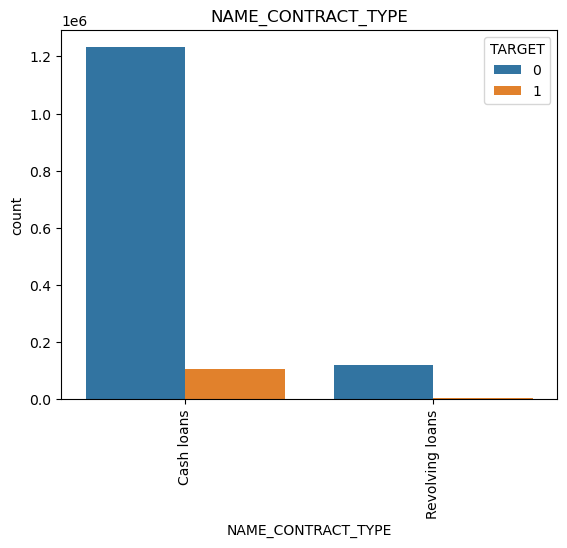

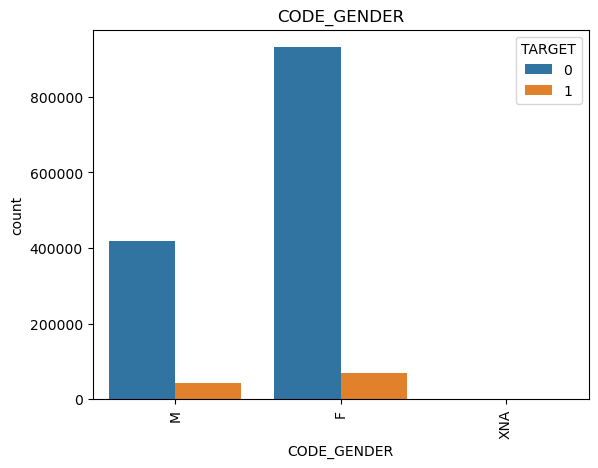

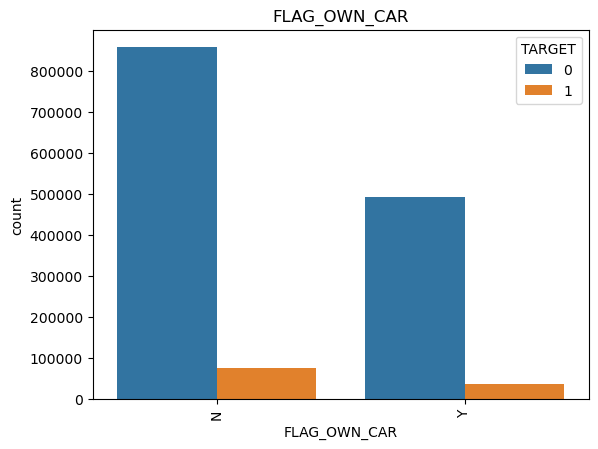

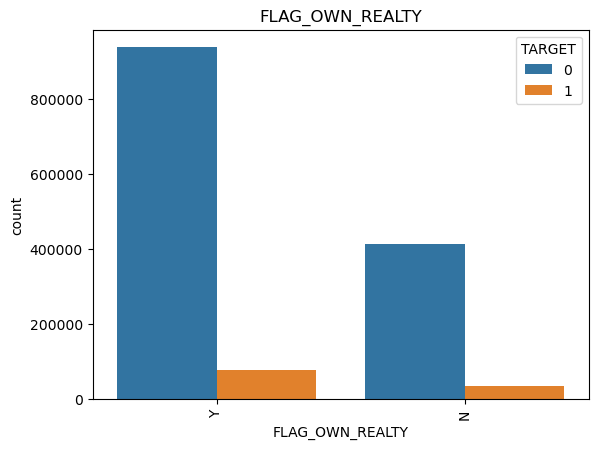

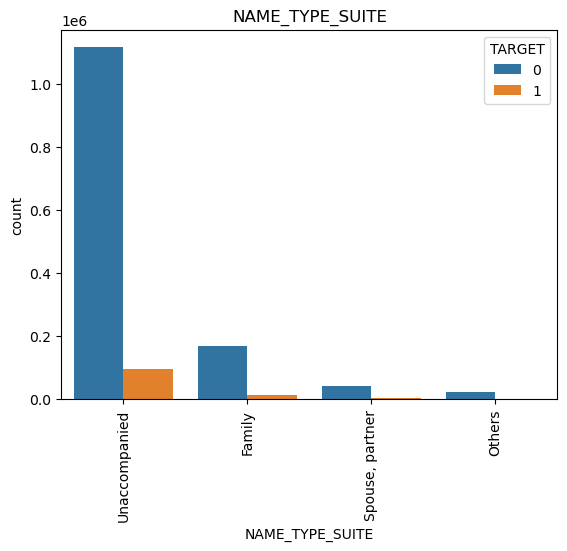

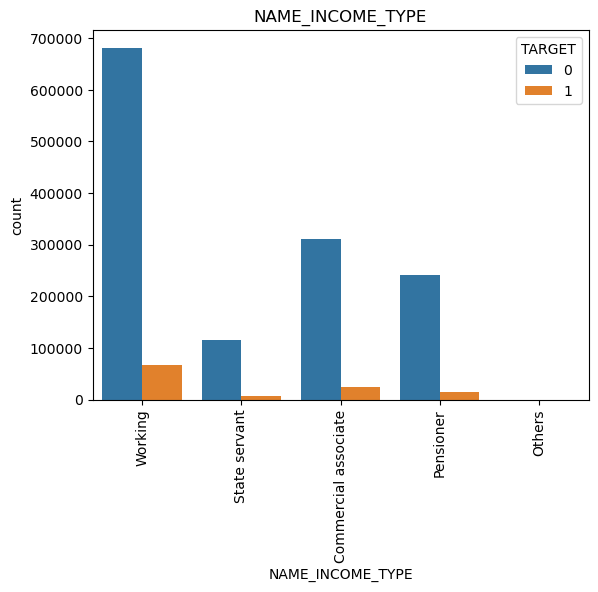

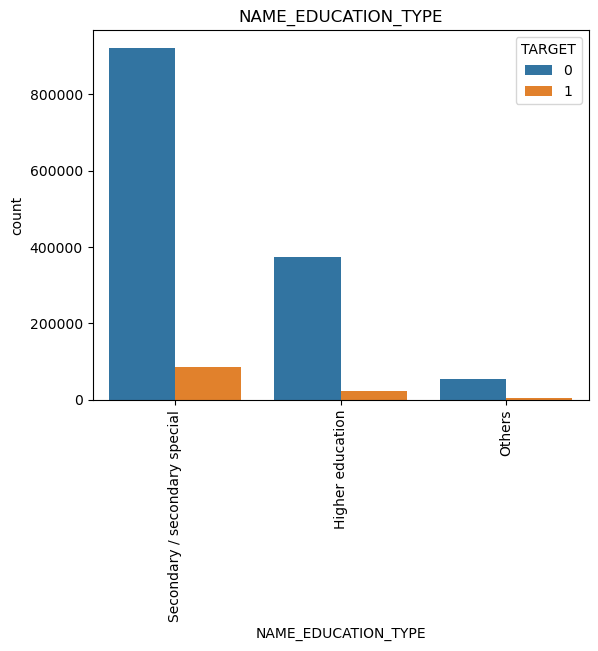

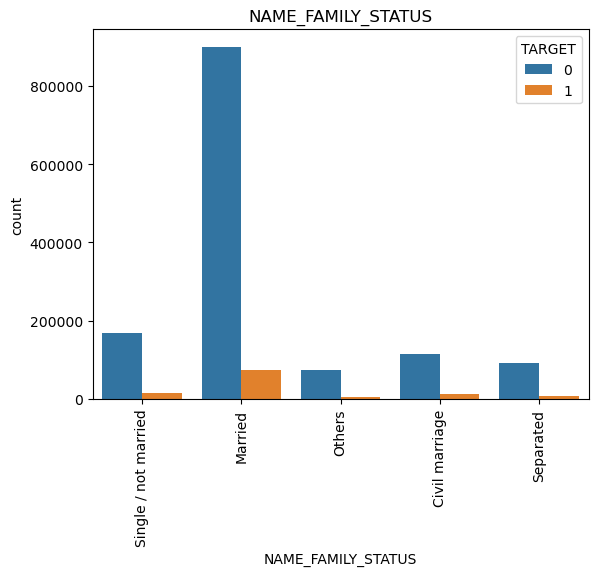

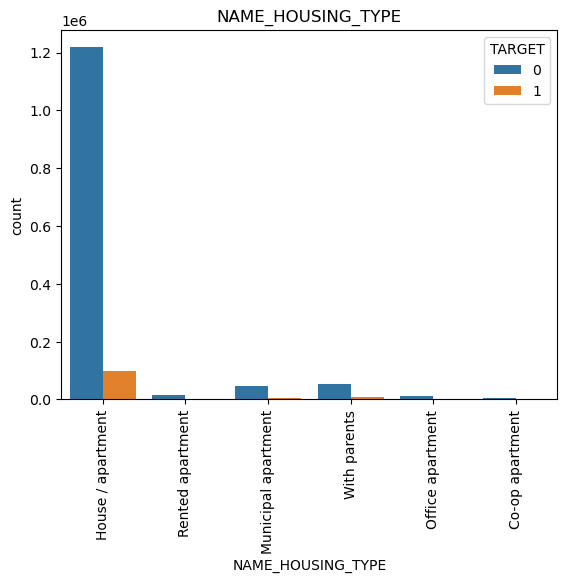

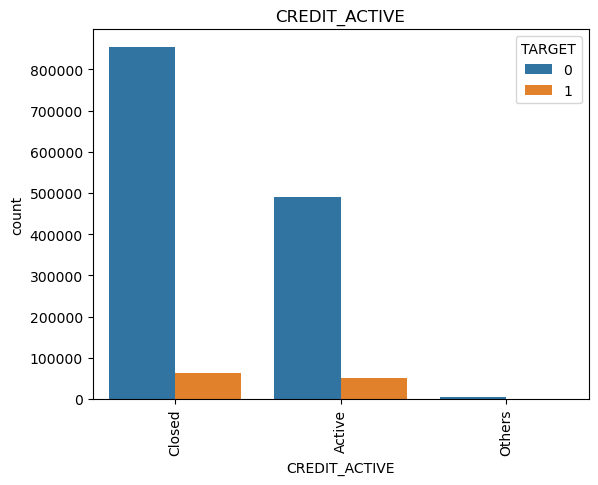

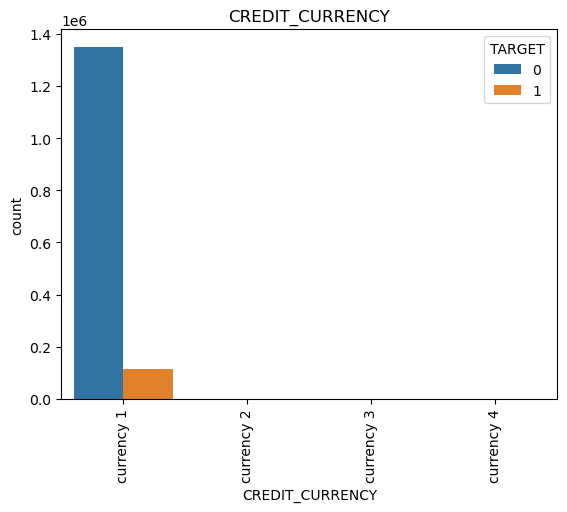

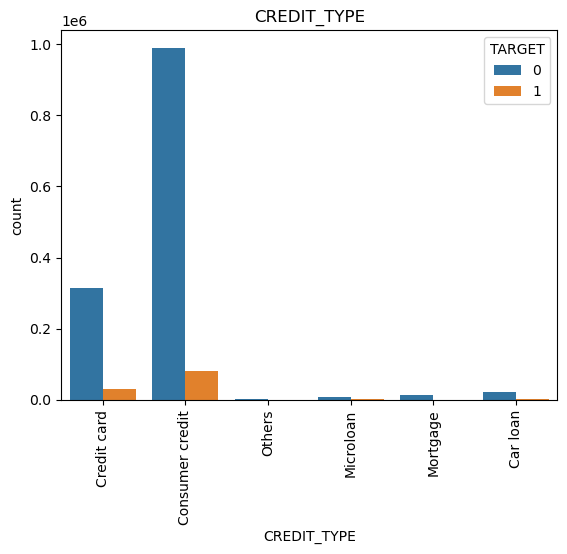

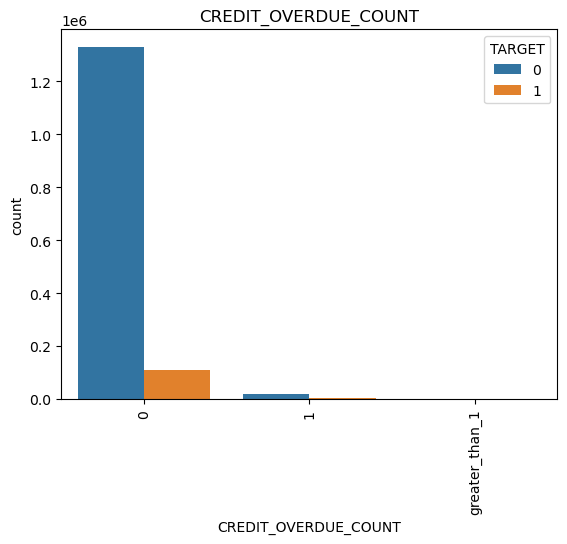

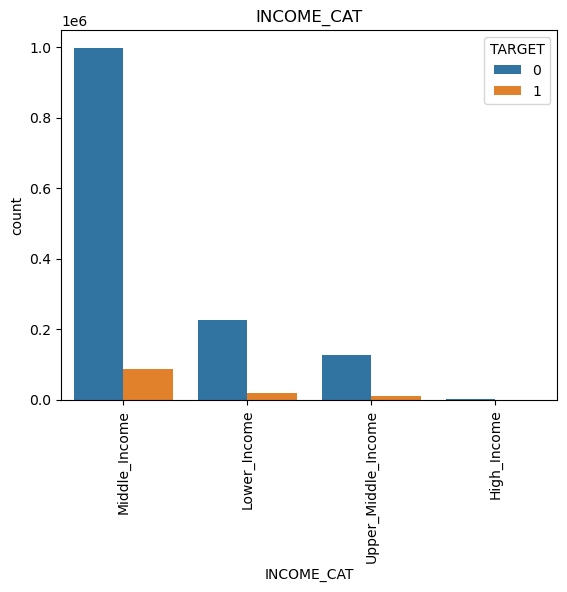

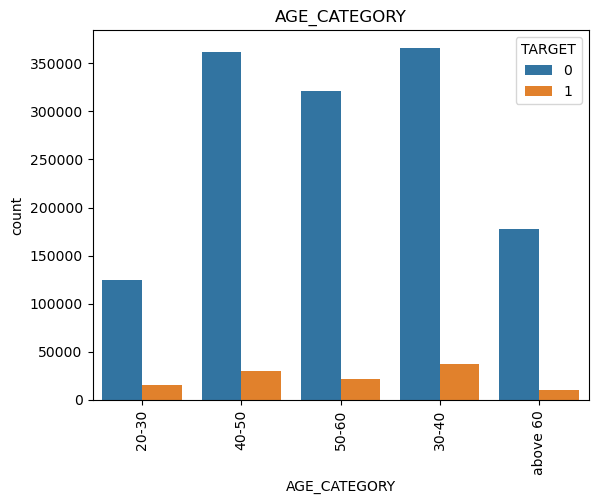

In [52]:
for i in cat_cols:
    sns.countplot(data=df_final,x=i,hue='TARGET')
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

#### Observations From Categorical Columns with Target Variable
- 'NAME_CONTRACT_TYPE' - Persons who take cash loans have more number of payment difficulties
- 'CODE_GENDER' - Feamales have more loans and more difficulties in number but Males are more proportionate payment difficulties
- 'NAME_FAMILY_STATUS' - Persons who married were got married gets more loans and more number of payment difficulties.
- 'NAME_HOUSING_TYPE', - Persons who lives in House/aparments have more number of payment difficulties
- 'CREDIT_ACTIVE', credit_active customers have more shows more proportionate payment difficulties... 
- 'CREDIT_TYPE', Those who use consumer credit have more number of payment difficulties
- 'CREDIT_OVERDUE_COUNT' - Those who have no overdues shows up more number of payment difficulties, but those who have one overdue have more proportionate payment difficulties
- 'INCOME_CAT' - Middle_Income category have more number of payment difficulties but Lower Income have more proportionate payment difficultiy
- 'AGE_CATEGORY', 30-40 and 40-50 age groups shows more number of payment difficulties, but 20-30 age group have more proportionate payment difficulty

In [53]:
int_cols

['TARGET',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DOCUMENT_COUNT',
 'MOB_NO_COUNT']

#### int_cols

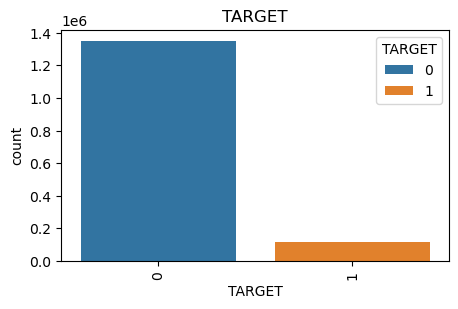

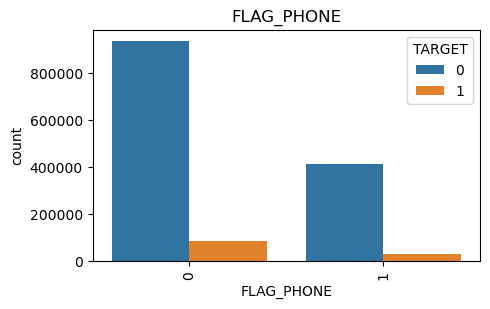

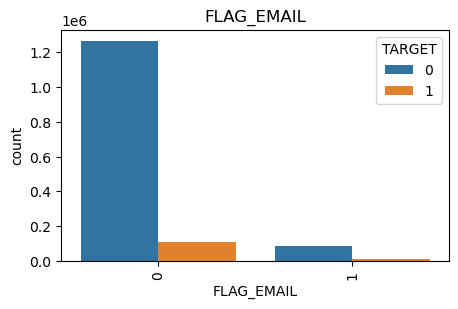

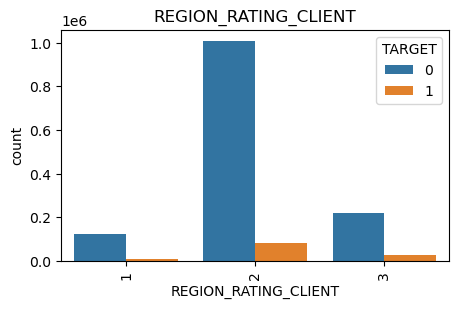

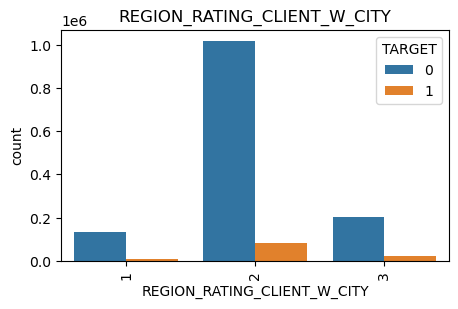

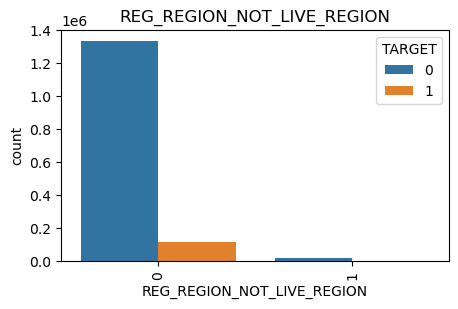

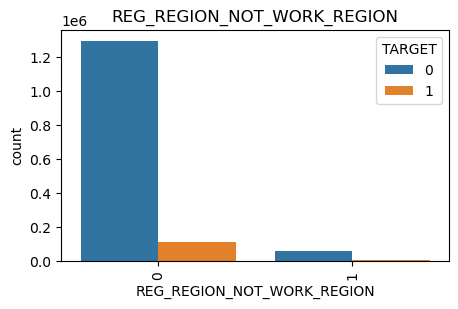

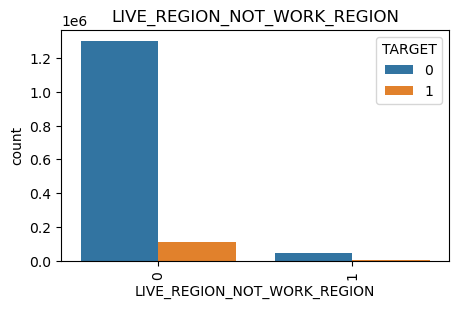

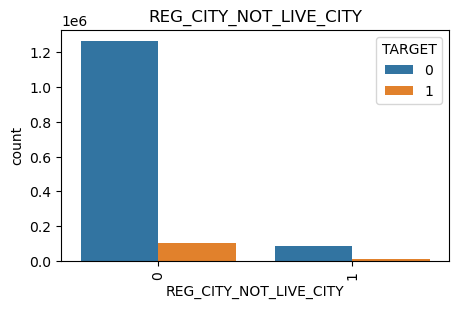

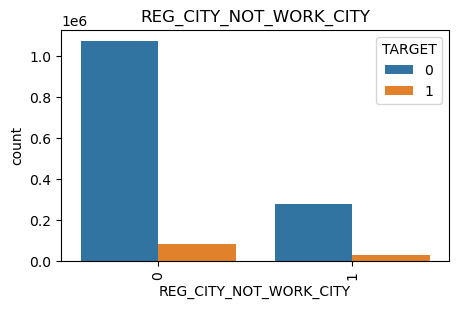

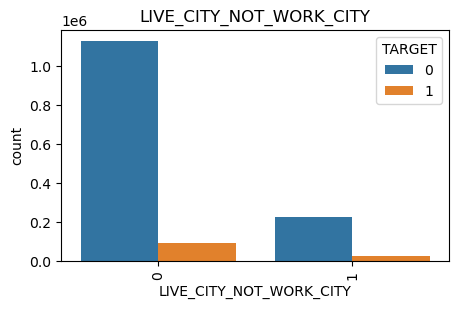

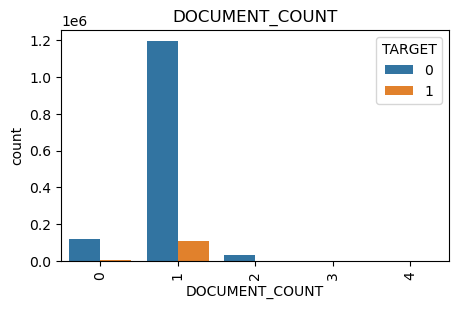

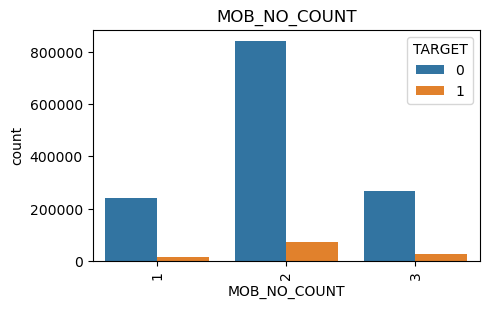

In [54]:
for i in int_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df_final,x=i,hue='TARGET')
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

#### Observations from Integer columns 

- TARGET column, the persons payment difficulties is unbalanced
- For the 'FLAG_PHONE'  feature those who have no phone have higher number of payment difficulties
- Those who not provided email have higher number of payment difficulties
- for the REGION_RATING_CLIENT column 2 rated regions have higher payemnt difficulties and 3 rated columns have higher rate of payment difficulties
- REGION_RATING_CLIENT_W_CITY 2 rated city have more payment difficult persons and 3 rated city have more proportionate payment difficult persons
- Those who live in REG_CITYNOT_WORK_CITY have higher proportionate payment dificulties
- Those who have DOCUMENT_COUNT only 1 have higher number of payment difficulties
- Those who have MOB_NO_COUNT 2 or more have higher payment difficulties

In [55]:
df_final.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'CREDIT_ACTIVE',
       'CREDIT_CURRENCY', 'CREDIT_TYPE', 'CREDIT_OVERDUE_COUNT', 'INCOME_CAT',
       'AGE_CATEGORY'],
      dtype='object')

## Label Encoding for cat_cols

In [56]:
cat_cols1=['NAME_INCOME_TYPE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','CREDIT_ACTIVE','CREDIT_TYPE']
cat_cols2 = [i for i in cat_cols if i not in cat_cols1]
cat_cols2

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'CREDIT_CURRENCY',
 'CREDIT_OVERDUE_COUNT',
 'INCOME_CAT',
 'AGE_CATEGORY']

In [57]:
for i in cat_cols1:
    df_dummies = pd.get_dummies(df_final[i],prefix=i,prefix_sep='_',dtype=int)
    df_dummies = df_dummies.drop(columns = [col for col in df_dummies.columns if col.endswith('_Others')],errors='ignore',inplace=True)
    df_final=pd.concat([df_final,df_dummies],axis=1)
    df_final.drop(columns=i,inplace=True)

In [58]:
df_dummies1 = pd.get_dummies(df_final['CODE_GENDER'],prefix='CODE_GENDER',prefix_sep='_',dtype=int)
df_dummies1.drop(columns=['CODE_GENDER_XNA'],inplace=True)
df_final= pd.concat([df_final,df_dummies1],axis=1)
df_final.drop(columns=['CODE_GENDER'],inplace=True)

df_dummies2 = pd.get_dummies(df_final['FLAG_OWN_REALTY'],prefix='FLAG_OWN_REALTY',prefix_sep='_',dtype=int)
df_dummies2.drop(columns=['FLAG_OWN_REALTY_N'],inplace=True)
df_final= pd.concat([df_final,df_dummies2],axis=1)
df_final.drop(columns=['FLAG_OWN_REALTY'],inplace=True)

#FLAG_OWN_CAR
flag_car = {'Y':1,'N':0}
df_final.FLAG_OWN_CAR = df_final.FLAG_OWN_CAR.map(flag_car)
#NAME_CONTRACT_TYPE
df_dummies3 = pd.get_dummies(df_final['NAME_CONTRACT_TYPE'],prefix='NAME_CONTRACT_TYPE',prefix_sep='_',dtype=int)
df_dummies3.drop(columns=['NAME_CONTRACT_TYPE_Revolving loans'],inplace=True)
df_final = pd.concat([df_final,df_dummies3],axis=1)
df_final.drop(columns=['NAME_CONTRACT_TYPE'],inplace=True)

#NAME_HOUSING_TYPE
df_dummies4 = pd.get_dummies(df_final['NAME_HOUSING_TYPE'],prefix='NAME_HOUSING_TYPE',prefix_sep='_',dtype=int)
df_dummies4.drop(columns=['NAME_HOUSING_TYPE_Co-op apartment'],inplace=True)
df_final = pd.concat([df_final,df_dummies4],axis=1)
df_final.drop(columns=['NAME_HOUSING_TYPE'],inplace=True)

#INCOME_CAT
df_dummies5 = pd.get_dummies(df_final['INCOME_CAT'],prefix='INCOME_CAT',prefix_sep='_',dtype=int)
df_dummies5.drop(columns=['INCOME_CAT_High_Income'],inplace=True)
df_final = pd.concat([df_final,df_dummies5],axis=1)
df_final.drop(columns=['INCOME_CAT'],inplace=True)
#AGE_CATEGORY
df_dummies6 = pd.get_dummies(df_final['AGE_CATEGORY'],prefix='AGE_CATEGORY',prefix_sep='_',dtype=int)
df_dummies6.drop(columns=['AGE_CATEGORY_20-30'],inplace=True)
df_final = pd.concat([df_final,df_dummies6],axis=1)
df_final.drop(columns=['AGE_CATEGORY'],inplace=True)

# CREDIT_OVERDUE_COUNT
df_dummies7 = pd.get_dummies(df_final['CREDIT_OVERDUE_COUNT'],prefix='CREDIT_OVERDUE_COUNT',prefix_sep='_',dtype=int)
df_dummies7.drop(columns=['CREDIT_OVERDUE_COUNT_greater_than_1'],inplace=True)
df_final = pd.concat([df_final,df_dummies7],axis=1)
df_final.drop(columns=['CREDIT_OVERDUE_COUNT'],inplace=True)

#NAME_TYPE_SUITE
df_dummies6 = pd.get_dummies(df_final['NAME_TYPE_SUITE'],prefix='NAME_TYPE_SUITE',prefix_sep='_',dtype=int)
df_dummies6.drop(columns=['NAME_TYPE_SUITE_Others'],inplace=True)
df_final = pd.concat([df_final,df_dummies6],axis=1)
df_final.drop(columns=['NAME_TYPE_SUITE'],inplace=True)

In [59]:
df_final.drop(columns=['CREDIT_CURRENCY'],inplace=True)

In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465325 entries, 0 to 1465324
Data columns (total 68 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   TARGET                                 1465325 non-null  int64  
 1   FLAG_OWN_CAR                           1465325 non-null  int64  
 2   CNT_CHILDREN                           1465325 non-null  float64
 3   AMT_INCOME_TOTAL                       1465325 non-null  float64
 4   AMT_CREDIT                             1465325 non-null  float64
 5   AMT_ANNUITY_x                          1465325 non-null  float64
 6   AMT_GOODS_PRICE                        1465325 non-null  float64
 7   REGION_POPULATION_RELATIVE             1465325 non-null  float64
 8   DAYS_BIRTH                             1465325 non-null  float64
 9   DAYS_EMPLOYED                          1465325 non-null  float64
 10  DAYS_REGISTRATION                      146

### Multivariate Analysis

#### Correlation for the numeric variables

In [61]:
conv_corr = df_final.select_dtypes(['float64','int64']).corr()
mask = np.triu(np.ones(conv_corr.shape), k=1).astype(bool)

# Apply the mask and unstack the correlations
conv_corr_unstacked = conv_corr.where(mask).stack()

# Sort the correlations and display the top 10
top_10_corr = conv_corr_unstacked.sort_values(ascending=False).head(15)
print(top_10_corr)

NUM_TRADES_REPORTED         NUM_CLOSED_TRADES             1.00
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      1.00
AMT_CREDIT                  AMT_GOODS_PRICE               0.99
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY   0.95
CNT_CHILDREN                CNT_FAM_MEMBERS               0.88
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION   0.87
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE      0.86
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY       0.84
AMT_ANNUITY_x               AMT_GOODS_PRICE               0.78
AMT_CREDIT                  AMT_ANNUITY_x                 0.78
DAYS_CREDIT                 DAYS_CREDIT_UPDATE            0.68
AMT_CREDIT_SUM              AMT_CREDIT_SUM_DEBT           0.59
DAYS_BIRTH                  MOB_NO_COUNT                  0.49
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION    0.43
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY        0.42
dtype: float64


In [62]:
cols_drop = ['NUM_CLOSED_TRADES','OBS_60_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE','REGION_RATING_CLIENT_W_CITY',
             'CNT_FAM_MEMBERS','LIVE_REGION_NOT_WORK_REGION','DEF_60_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY',
             'AMT_GOODS_PRICE','AMT_ANNUITY_x','DAYS_CREDIT','AMT_CREDIT_SUM']
df_final.drop(columns=cols_drop,inplace=True)

In [63]:
conv_corr = df_final.select_dtypes(['float64','int64']).corr()
mask = np.triu(np.ones(conv_corr.shape), k=1).astype(bool)

# Apply the mask and unstack the correlations
conv_corr_unstacked = conv_corr.where(mask).stack()

# Sort the correlations and display the top 10
bottom_10_corr = conv_corr_unstacked.sort_values(ascending=True).head(15)
print(bottom_10_corr)

DAYS_EMPLOYED               MOB_NO_COUNT             -0.77
DAYS_BIRTH                  DAYS_EMPLOYED            -0.61
REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT     -0.50
REGION_RATING_CLIENT        EXT_SOURCE_2             -0.28
CNT_CHILDREN                DAYS_EMPLOYED            -0.24
DAYS_EMPLOYED               DAYS_ID_PUBLISH          -0.24
                            REG_CITY_NOT_WORK_CITY   -0.24
EXT_SOURCE_3                NUM_TRADES_REPORTED      -0.22
DAYS_EMPLOYED               DAYS_REGISTRATION        -0.19
TARGET                      EXT_SOURCE_3             -0.18
EXT_SOURCE_2                DAYS_LAST_PHONE_CHANGE   -0.18
DAYS_BIRTH                  EXT_SOURCE_3             -0.16
FLAG_OWN_CAR                DAYS_EMPLOYED            -0.16
EXT_SOURCE_3                DAYS_CREDIT_UPDATE       -0.15
TARGET                      EXT_SOURCE_2             -0.15
dtype: float64


In [64]:
df_final.drop(columns=['DAYS_EMPLOYED'],inplace=True)

In [65]:
conv_corr = df_final.select_dtypes(['int64']).corr()
mask = np.triu(np.ones(conv_corr.shape), k=1).astype(bool)

# Apply the mask and unstack the correlations
conv_corr_unstacked = conv_corr.where(mask).stack()

# Sort the correlations and display the top 10
top_10_corr = conv_corr_unstacked.sort_values(ascending=False).head(10)
print(top_10_corr)

REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION   0.43
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY       0.42
REG_REGION_NOT_LIVE_REGION  REG_CITY_NOT_LIVE_CITY       0.34
REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_WORK_CITY       0.24
REG_CITY_NOT_WORK_CITY      MOB_NO_COUNT                 0.22
FLAG_PHONE                  MOB_NO_COUNT                 0.20
REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY       0.15
REG_REGION_NOT_LIVE_REGION  REG_CITY_NOT_WORK_CITY       0.14
FLAG_OWN_CAR                MOB_NO_COUNT                 0.11
REG_REGION_NOT_WORK_REGION  MOB_NO_COUNT                 0.10
dtype: float64


In [66]:
conv_corr = df_final.select_dtypes(['int64']).corr()
mask = np.triu(np.ones(conv_corr.shape), k=1).astype(bool)

# Apply the mask and unstack the correlations
conv_corr_unstacked = conv_corr.where(mask).stack()

# Sort the correlations and display the top 10
bottom_10_corr = conv_corr_unstacked.sort_values(ascending=True).head(10)
print(bottom_10_corr)

REGION_RATING_CLIENT  REG_REGION_NOT_WORK_REGION   -0.14
FLAG_PHONE            REGION_RATING_CLIENT         -0.07
FLAG_EMAIL            REGION_RATING_CLIENT         -0.05
REGION_RATING_CLIENT  REG_REGION_NOT_LIVE_REGION   -0.05
FLAG_PHONE            REG_CITY_NOT_LIVE_CITY       -0.04
                      REG_CITY_NOT_WORK_CITY       -0.04
FLAG_OWN_CAR          REGION_RATING_CLIENT         -0.03
REGION_RATING_CLIENT  MOB_NO_COUNT                 -0.03
TARGET                FLAG_OWN_CAR                 -0.02
                      FLAG_PHONE                   -0.02
dtype: float64


In [67]:
df_final.shape

(1465325, 56)

In [68]:
df_final.head()

TARGET  FLAG_OWN_CAR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0       1             0          0.00         202500.00   406597.50   
1       1             0          0.00         202500.00   406597.50   
2       1             0          0.00         202500.00   406597.50   
3       1             0          0.00         202500.00   406597.50   
4       1             0          0.00         202500.00   406597.50   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                        0.02    -9461.00           -3648.00         -2120.00   
1                        0.02    -9461.00           -3648.00         -2120.00   
2                        0.02    -9461.00           -3648.00         -2120.00   
3                        0.02    -9461.00           -3648.00         -2120.00   
4                        0.02    -9461.00           -3648.00         -2120.00   

   FLAG_PHONE  FLAG_EMAIL  REGION_RATING_CLIENT  REG_REGION_NOT_LIVE_REGION  \
0           1           0                     2                           0   
1           1           0                     2                           0   
2           1           0                     2                           0   
3           1           0                     2                           0   
4           1           0                     2                           0   

   REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                           0                       0                       0   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0          0.26          0.14                      2.00   
1          0.26          0.14                      2.00   
2          0.26          0.14                      2.00   
3          0.26          0.14                      2.00   
4          0.26          0.14                      2.00   

   DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                      2.00                -1134.00   
1                      2.00                -1134.00   
2                      2.00                -1134.00   
3                      2.00                -1134.00   
4                      2.00                -1134.00   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.00                       0.00   
1                        0.00                       0.00   
2                        0.00                       0.00   
3                        0.00                       0.00   
4                        0.00                       0.00   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.00                       0.00   
1                        0.00                       0.00   
2                        0.00                       0.00   
3                        0.00                       0.00   
4                        0.00                       0.00   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  CREDIT_DAY_OVERDUE  \
0                       0.00                        1.00                0.00   
1                       0.00                        1.00                0.00   
2                       0.00                        1.00                0.00   
3                       0.00                        1.00                0.00   
4                       0.00                        1.00                0.00   

   DAYS_CREDIT_ENDDATE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM_DEBT  \
0             -1038.00                0.00                 0.00   
1              -334.00                0.00                 0.00   
2             -1072.00               

In [69]:
conv_corr = df_final.corr()
mask = np.triu(np.ones(conv_corr.shape), k=1).astype(bool)

# Apply the mask and unstack the correlations
conv_corr_unstacked = conv_corr.where(mask).stack()

# Sort the correlations and display the top 10
top_10_corr = conv_corr_unstacked.sort_values(ascending=False).head(10)
print(top_10_corr)

DOCUMENT_COUNT              NAME_CONTRACT_TYPE_Cash loans   0.77
DAYS_BIRTH                  AGE_CATEGORY_30-40              0.54
                            MOB_NO_COUNT                    0.49
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION      0.43
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY          0.42
CNT_CHILDREN                DAYS_BIRTH                      0.37
CREDIT_DAY_OVERDUE          MAX_CREDITDAY_OVERDUE           0.37
FLAG_OWN_CAR                CODE_GENDER_M                   0.36
CNT_CHILDREN                AGE_CATEGORY_30-40              0.36
REG_REGION_NOT_LIVE_REGION  REG_CITY_NOT_LIVE_CITY          0.34
dtype: float64


In [70]:
df_final.drop(columns=['DOCUMENT_COUNT'],inplace=True)

In [71]:
conv_corr = df_final.corr()
mask = np.triu(np.ones(conv_corr.shape), k=1).astype(bool)

# Apply the mask and unstack the correlations
conv_corr_unstacked = conv_corr.where(mask).stack()

# Sort the correlations and display the top 10
bottom_10_corr = conv_corr_unstacked.sort_values(ascending=True).head(10)
print(bottom_10_corr)

CODE_GENDER_F                        CODE_GENDER_M                           -1.00
CREDIT_OVERDUE_COUNT_0               CREDIT_OVERDUE_COUNT_1                  -0.96
INCOME_CAT_Lower_Income              INCOME_CAT_Middle_Income                -0.75
NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_With parents          -0.62
DAYS_BIRTH                           AGE_CATEGORY_above 60                   -0.61
NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_Municipal apartment   -0.56
INCOME_CAT_Middle_Income             INCOME_CAT_Upper_Middle_Income          -0.54
REGION_POPULATION_RELATIVE           REGION_RATING_CLIENT                    -0.50
MOB_NO_COUNT                         AGE_CATEGORY_above 60                   -0.48
DAYS_BIRTH                           AGE_CATEGORY_50-60                      -0.47
dtype: float64


In [72]:
df_final.drop(columns=['CODE_GENDER_F','CREDIT_OVERDUE_COUNT_0','INCOME_CAT_Middle_Income',
                       'NAME_HOUSING_TYPE_House / apartment','DAYS_BIRTH'],inplace=True)

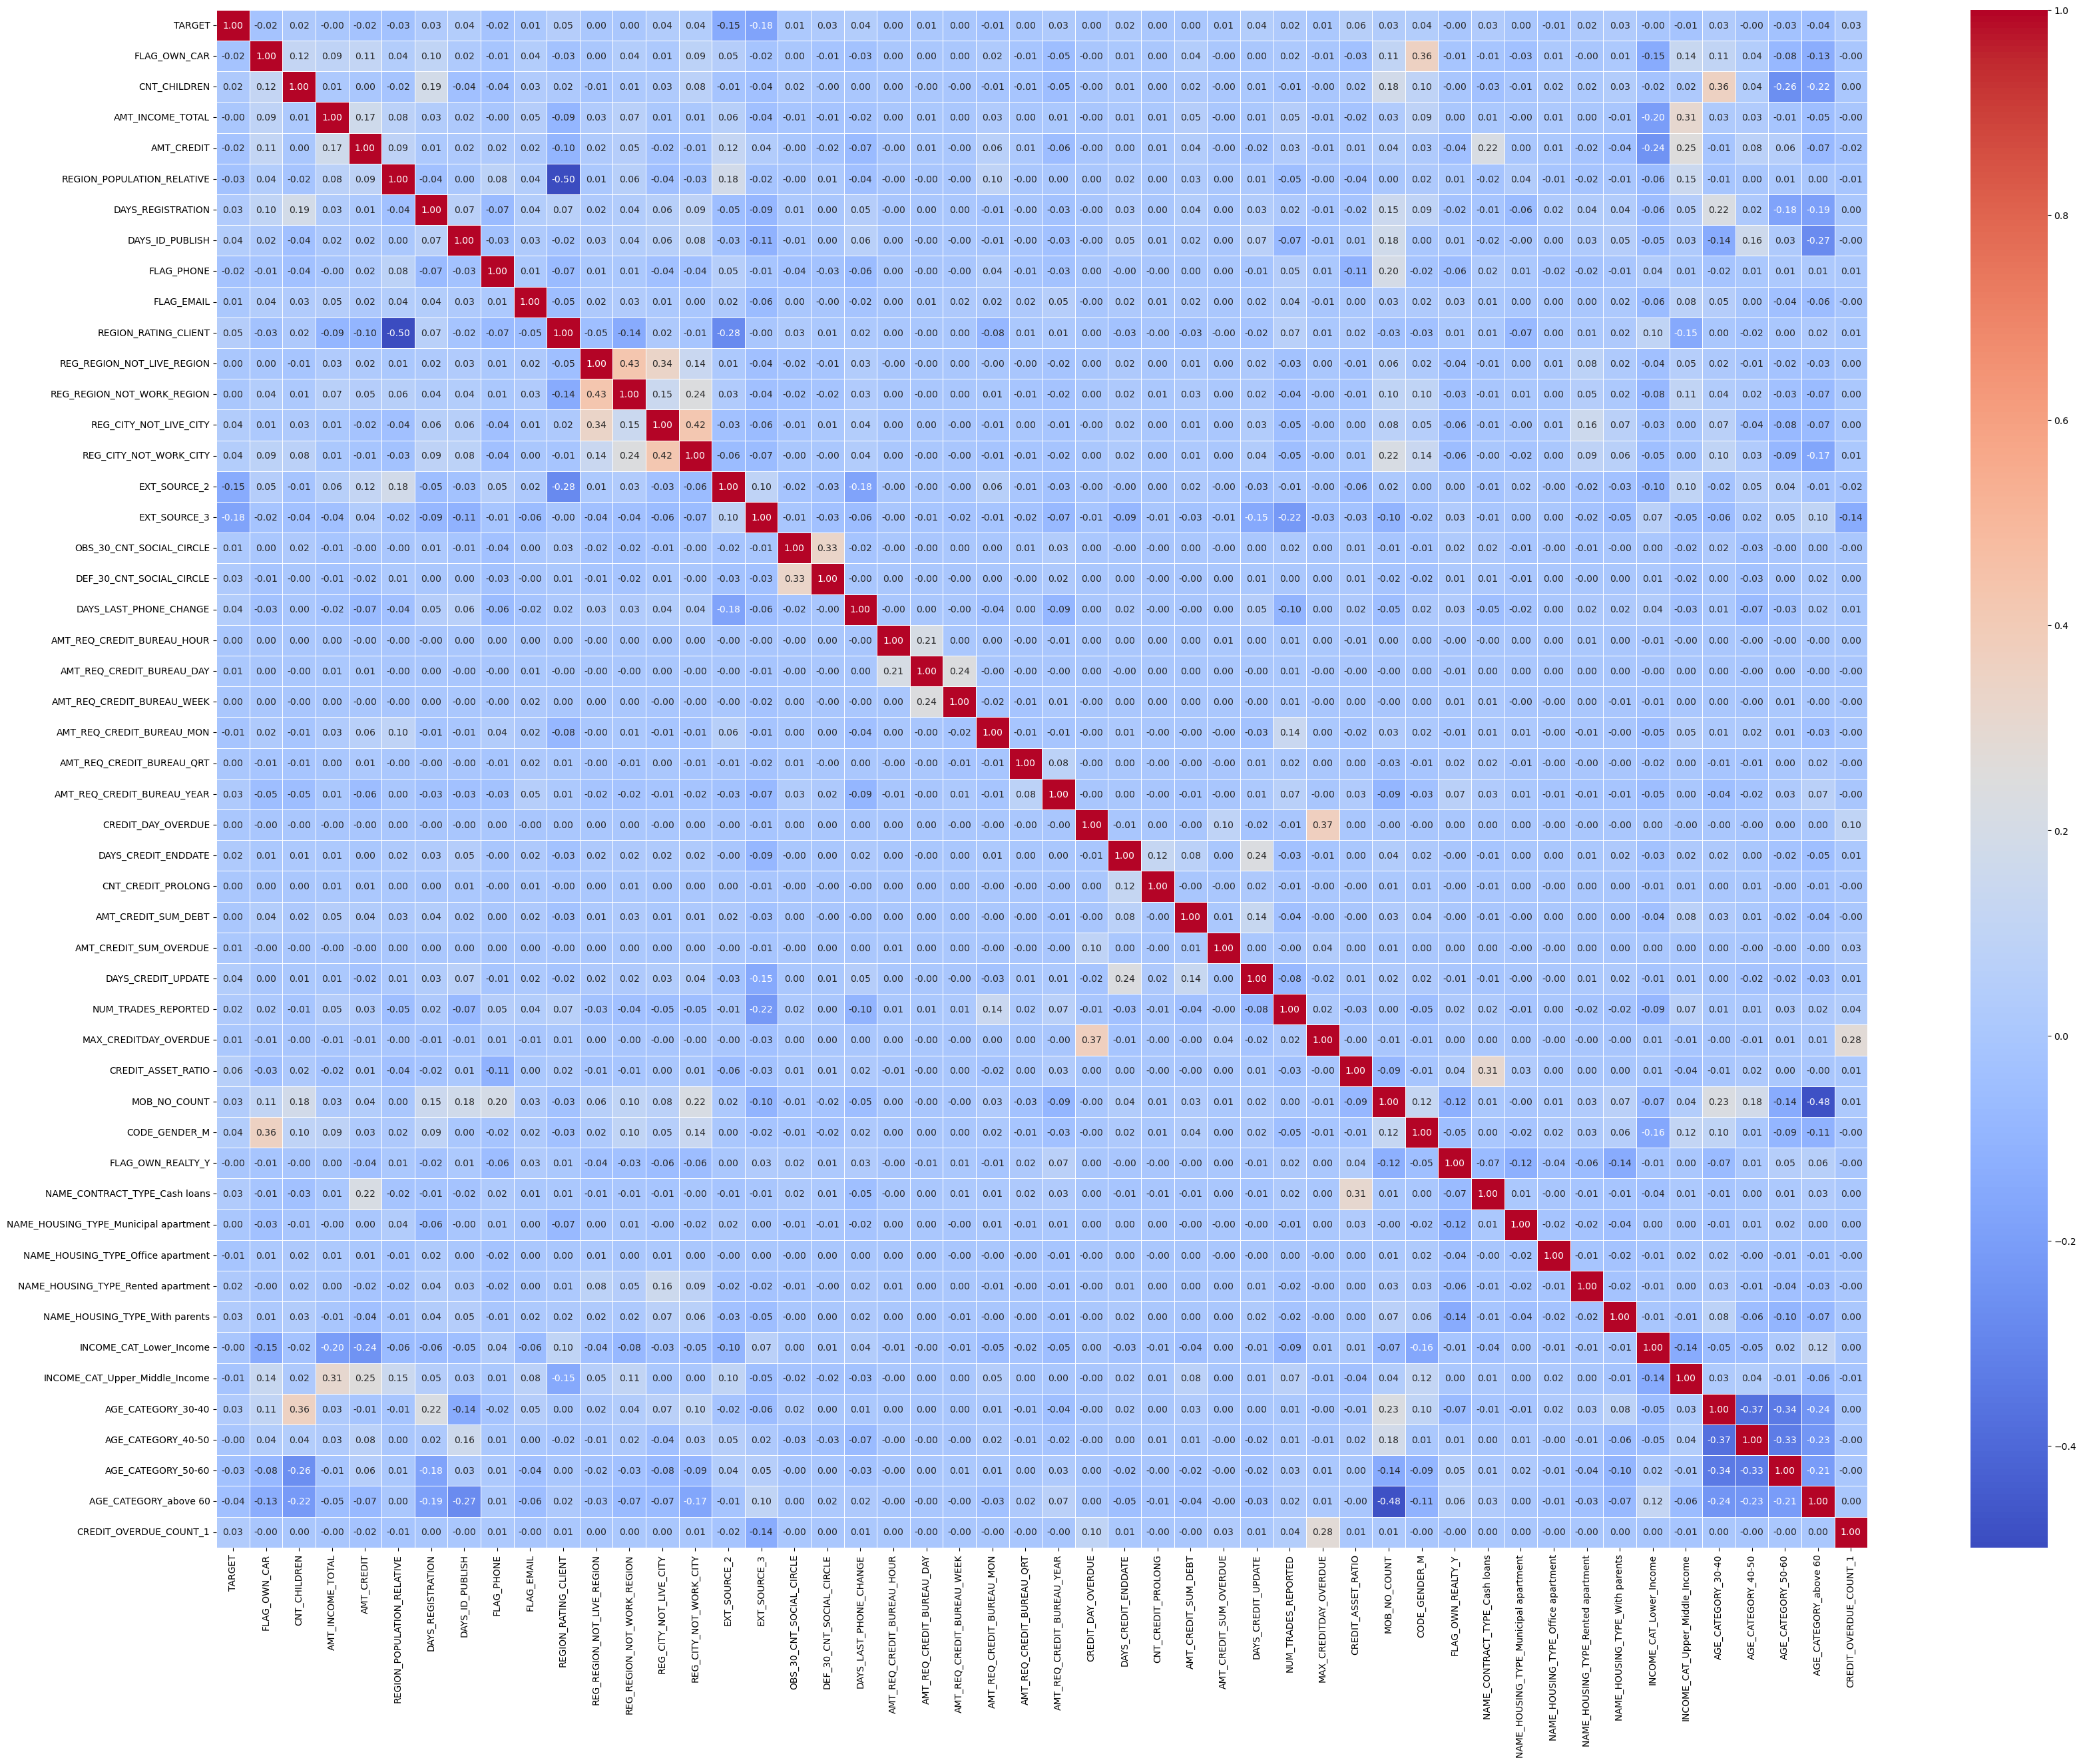

In [73]:
plt.figure(figsize=(40,30))
sns.heatmap(df_final.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidth=0.5)
plt.show()

In [74]:
bfsi_df = df_final.copy()

In [75]:
%store bfsi_df

Stored 'bfsi_df' (DataFrame)


## Train-Test Split

In [76]:
x=bfsi_df.drop(columns=['TARGET'])
y=bfsi_df['TARGET']

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [78]:
print(x_train.shape,x_test.shape)

(1025727, 49) (439598, 49)


In [79]:
#x_train.drop(columns=['EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True)
#x_test.drop(columns=['EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True)

## Model Building

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf=RandomForestClassifier(criterion='gini',random_state=42,n_jobs=-1,max_depth=8,min_samples_leaf=50,min_samples_split=50,class_weight='balanced')

In [82]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=50, min_samples_split=50, n_jobs=-1,
                       random_state=42)

In [83]:
# Feature Importance
Feature_importance=pd.DataFrame({'Features':x_train.columns,'Feature_Importance':rf.feature_importances_})
Feature_importance.sort_values(by=['Feature_Importance'],ascending=False).head(20)

Features  Feature_Importance
15                   EXT_SOURCE_3                0.41
14                   EXT_SOURCE_2                0.24
33             CREDIT_ASSET_RATIO                0.07
18         DAYS_LAST_PHONE_CHANGE                0.03
6                 DAYS_ID_PUBLISH                0.02
3                      AMT_CREDIT                0.02
35                  CODE_GENDER_M                0.02
26            DAYS_CREDIT_ENDDATE                0.02
31            NUM_TRADES_REPORTED                0.02
4      REGION_POPULATION_RELATIVE                0.01
9            REGION_RATING_CLIENT                0.01
30             DAYS_CREDIT_UPDATE                0.01
5               DAYS_REGISTRATION                0.01
32          MAX_CREDITDAY_OVERDUE                0.01
47          AGE_CATEGORY_above 60                0.01
37  NAME_CONTRACT_TYPE_Cash loans                0.01
28            AMT_CREDIT_SUM_DEBT                0.01
34                   MOB_NO_COUNT                0.01
2                AMT_INCOME_TOTAL                0.01
46             AGE_CATEGORY_50-60                0.01

In [84]:
sample_tree = rf.estimators_[5]

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.680152 to fit



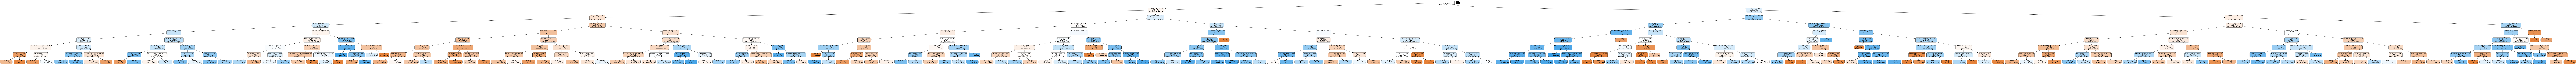

In [85]:
# Sample Tree
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data,filled=True,rounded=True,feature_names=x_train.columns)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [86]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

### Model Performance in train Data Set

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [88]:
print('Confusion_matrix:',confusion_matrix(y_train,y_train_pred))
print('Accuracy:',accuracy_score(y_train,y_train_pred))
print('Precision_Score:',precision_score(y_train,y_train_pred))
print('Recall Score:',recall_score(y_train,y_train_pred))
print('Classification Report:',classification_report(y_train,y_train_pred))

Confusion_matrix: [[675564 269930]
 [ 26125  54108]]
Accuracy: 0.7113705693620233
Precision_Score: 0.1669804158771502
Recall Score: 0.6743858512083557
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.71      0.82    945494
           1       0.17      0.67      0.27     80233

    accuracy                           0.71   1025727
   macro avg       0.56      0.69      0.54   1025727
weighted avg       0.90      0.71      0.78   1025727



### Model Evaluation

In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report


In [90]:
print('Confusion_matrix:',confusion_matrix(y_test,y_test_pred))
print('Accuracy:',accuracy_score(y_test,y_test_pred))
print('Precision_Score:',precision_score(y_test,y_test_pred))
print('Recall Score:',recall_score(y_test,y_test_pred))
print('Classification Report:',classification_report(y_test,y_test_pred))

Confusion_matrix: [[289393 115918]
 [ 11368  22919]]
Accuracy: 0.7104490921250779
Precision_Score: 0.16507847331763148
Recall Score: 0.6684457666170852
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.71      0.82    405311
           1       0.17      0.67      0.26     34287

    accuracy                           0.71    439598
   macro avg       0.56      0.69      0.54    439598
weighted avg       0.90      0.71      0.78    439598



### Feature Importance Plot

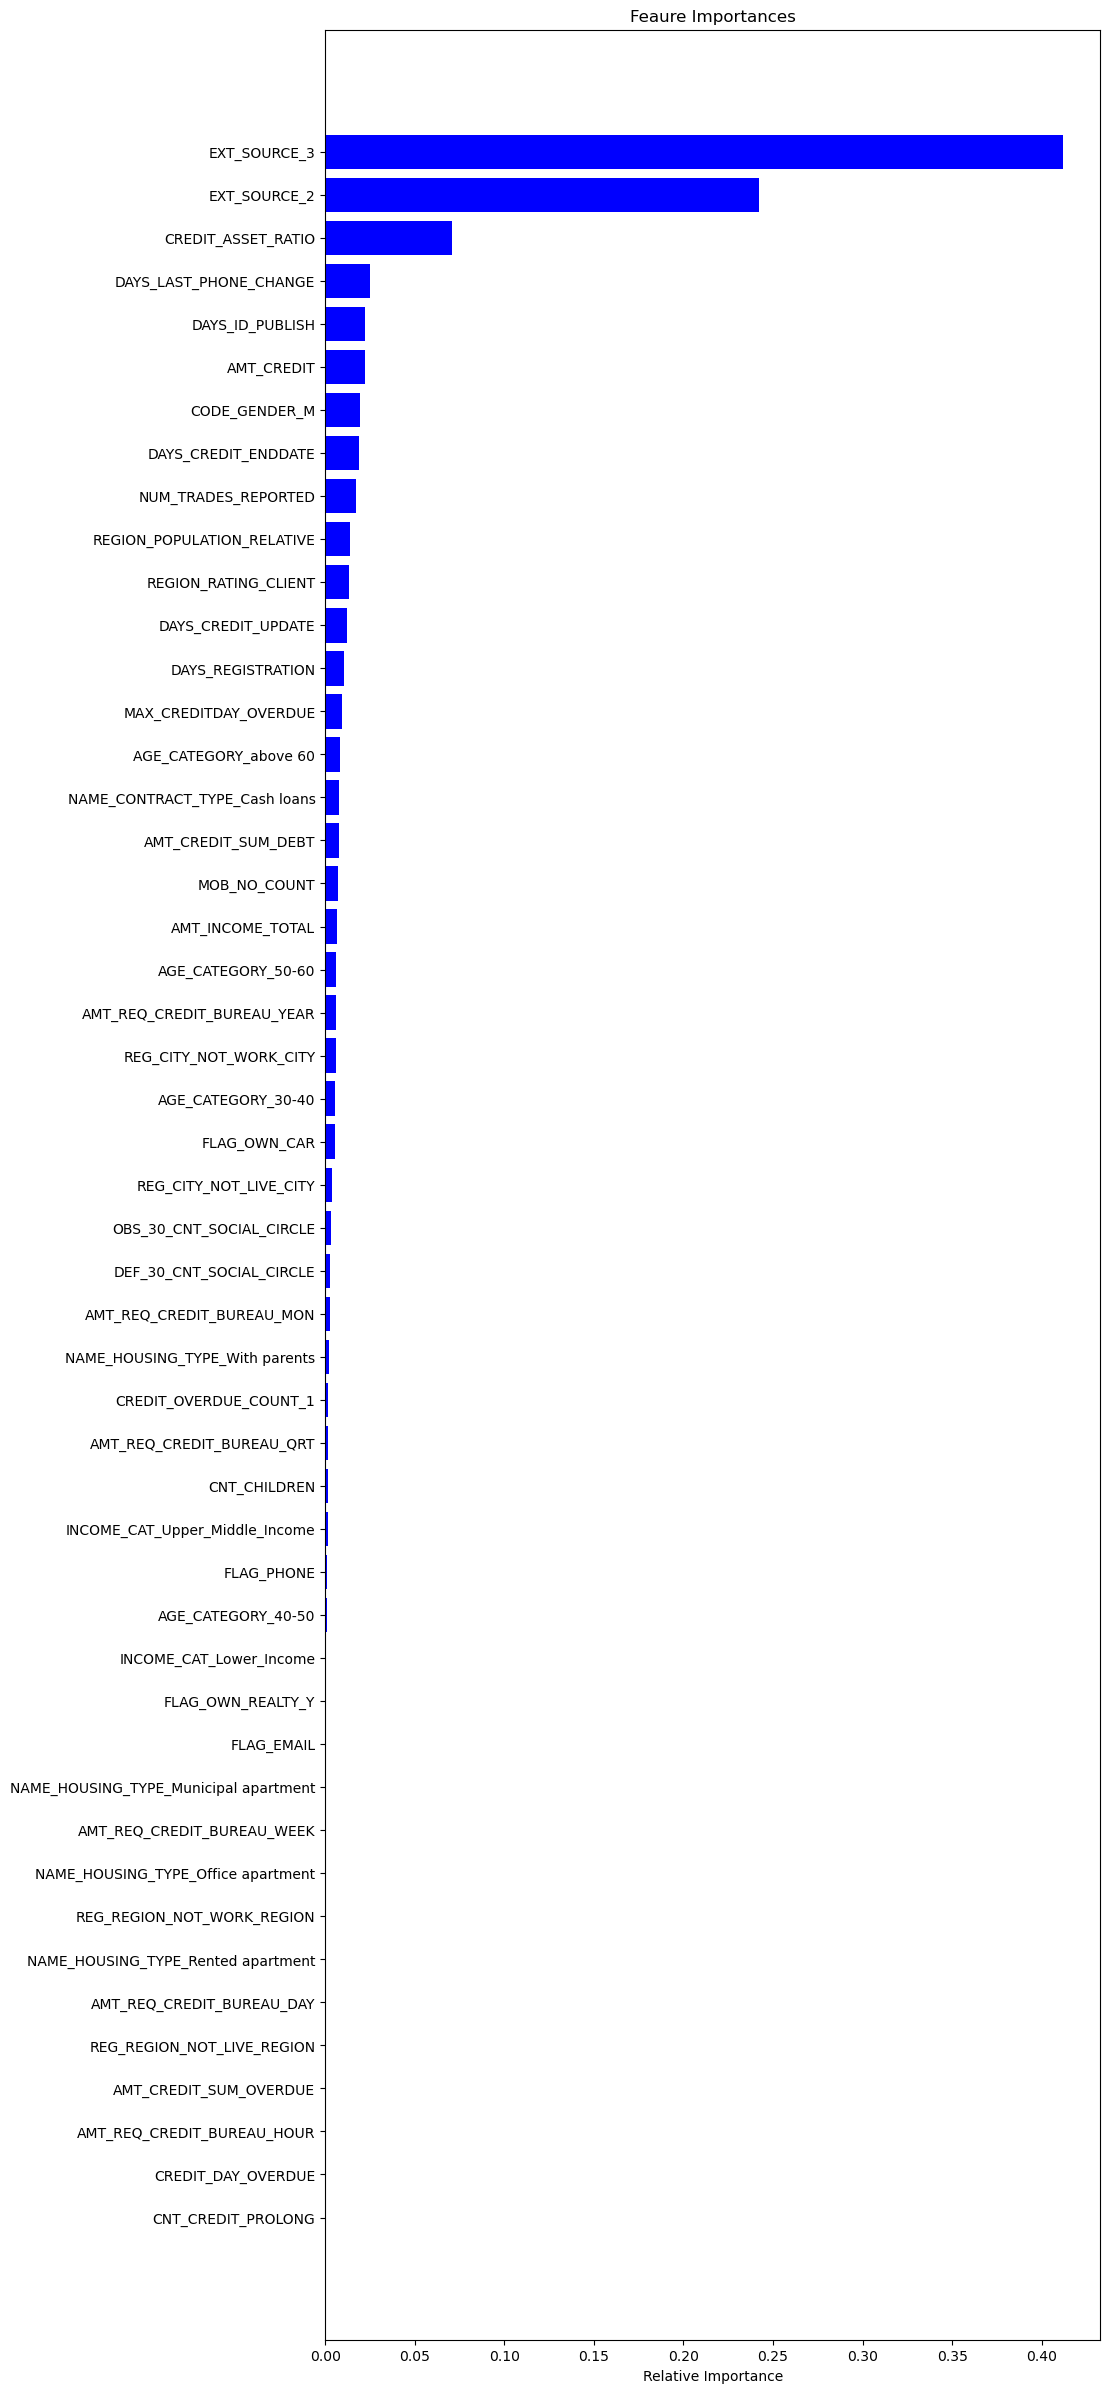

In [91]:
features = x_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,30))
plt.title('Feaure Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [92]:
bottom_features = Feature_importance.sort_values(by=['Feature_Importance'],ascending=True).head(20)
bottom_features

Features  Feature_Importance
27                     CNT_CREDIT_PROLONG                0.00
25                     CREDIT_DAY_OVERDUE                0.00
19             AMT_REQ_CREDIT_BUREAU_HOUR                0.00
29                 AMT_CREDIT_SUM_OVERDUE                0.00
10             REG_REGION_NOT_LIVE_REGION                0.00
20              AMT_REQ_CREDIT_BUREAU_DAY                0.00
40     NAME_HOUSING_TYPE_Rented apartment                0.00
11             REG_REGION_NOT_WORK_REGION                0.00
39     NAME_HOUSING_TYPE_Office apartment                0.00
21             AMT_REQ_CREDIT_BUREAU_WEEK                0.00
38  NAME_HOUSING_TYPE_Municipal apartment                0.00
8                              FLAG_EMAIL                0.00
36                      FLAG_OWN_REALTY_Y                0.00
42                INCOME_CAT_Lower_Income                0.00
45                     AGE_CATEGORY_40-50                0.00
7                              FLAG_PHONE                0.00
43         INCOME_CAT_Upper_Middle_Income                0.00
1                            CNT_CHILDREN                0.00
23              AMT_REQ_CREDIT_BUREAU_QRT                0.00
48                 CREDIT_OVERDUE_COUNT_1                0.00

In [93]:
unimp_features=[i for i in bottom_features.Features.unique()]


In [94]:
x_train.drop(columns = unimp_features,inplace=True)
x_test.drop(columns=unimp_features,inplace=True)

## Tree 2

In [95]:
rf1=RandomForestClassifier(criterion='gini',random_state=42,n_jobs=-1,max_depth=8,min_samples_leaf=100,min_samples_split=50,class_weight='balanced')

In [96]:
rf1.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=100, min_samples_split=50, n_jobs=-1,
                       random_state=42)

In [97]:
y_train_pred = rf1.predict(x_train)
y_test_pred = rf1.predict(x_test)

### Tree 2 Performance in the training data 

In [99]:
print('Confusion_matrix:',confusion_matrix(y_train,y_train_pred))
print('Accuracy:',accuracy_score(y_train,y_train_pred))
print('Precision_Score:',precision_score(y_train,y_train_pred))
print('Recall Score:',recall_score(y_train,y_train_pred))
print('Classification Report:',classification_report(y_train,y_train_pred))

Confusion_matrix: [[678907 266587]
 [ 26581  53652]]
Accuracy: 0.7141851584290947
Precision_Score: 0.1675373705263881
Recall Score: 0.6687024042476288
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.72      0.82    945494
           1       0.17      0.67      0.27     80233

    accuracy                           0.71   1025727
   macro avg       0.56      0.69      0.55   1025727
weighted avg       0.90      0.71      0.78   1025727



### Model Evaluation 

In [100]:
print('Confusion_matrix:',confusion_matrix(y_test,y_test_pred))
print('Accuracy:',accuracy_score(y_test,y_test_pred))
print('Precision_Score:',precision_score(y_test,y_test_pred))
print('Recall Score:',recall_score(y_test,y_test_pred))
print('Classification Report:',classification_report(y_test,y_test_pred))

Confusion_matrix: [[290893 114418]
 [ 11495  22792]]
Accuracy: 0.7135724002383996
Precision_Score: 0.1661103418118213
Recall Score: 0.6647417388514597
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.72      0.82    405311
           1       0.17      0.66      0.27     34287

    accuracy                           0.71    439598
   macro avg       0.56      0.69      0.54    439598
weighted avg       0.90      0.71      0.78    439598



## Hyper Prameter Tuning using GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
rf1 = RandomForestClassifier(random_state=42,n_jobs=-1)

In [103]:
hyper_params ={'max_depth':[5, 10],
               'max_features': [10, 20],
               'min_samples_leaf': [ 100, 200],
               'n_estimators': [50, 100]}

In [104]:
model_cv = GridSearchCV(estimator = rf1, 
             param_grid=hyper_params,
             verbose=1,
             cv=2,
             n_jobs=-1,
             return_train_score=True)

In [105]:
model_cv.fit(x_train,y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [10, 20],
                         'min_samples_leaf': [100, 200],
                         'n_estimators': [50, 100]},
             return_train_score=True, verbose=1)

In [107]:
model_cv.best_score_

0.922797196482157

In [114]:
best_esti = model_cv.best_estimator_
best_esti

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=100,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [110]:
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         268.23         29.41            18.00            3.52   
1         369.02         13.76            17.15            2.69   
2         258.09          0.09            13.78            0.02   
3         392.80         20.06            17.83            0.19   
4         376.17          3.39            13.97            1.45   

  param_max_depth param_max_features param_min_samples_leaf  \
0               5                 10                    100   
1               5                 10                    100   
2               5                 10                    200   
3               5                 10                    200   
4               5                 20                    100   

  param_n_estimators                                             params  \
0                 50  {'max_depth': 5, 'max_features': 10, 'min_samp...   
1                100  {'max_depth': 5, 'max_features': 10, 'min_samp...   
2                 50  {'max_depth': 5, 'max_features': 10, 'min_samp...   
3                100  {'max_depth': 5, 'max_features': 10, 'min_samp...   
4                 50  {'max_depth': 5, 'max_features': 20, 'min_samp...   

   split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0               0.92               0.92             0.92            0.00   
1               0.92               0.92             0.92            0.00   
2               0.92               0.92             0.92            0.00   
3               0.92               0.92             0.92            0.00   
4               0.92               0.92             0.92            0.00   

   rank_test_score  split0_train_score  split1_train_score  mean_train_score  \
0               13                0.92                0.92              0.92   
1               13                0.92                0.92              0.92   
2               13                0.92                0.92              0.92   
3               13                0.92                0.92              0.92   
4                7                0.92                0.92              0.92   

   std_train_score  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4             0.00

In [111]:
cv_df.sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
12         595.43          8.45             9.69            1.34   
13         745.47         14.39             5.11            0.94   
8          355.07          1.84            17.40            1.81   
9          640.59          2.61            28.20            1.15   
14         530.86          4.53             7.49            0.48   

   param_max_depth param_max_features param_min_samples_leaf  \
12              10                 20                    100   
13              10                 20                    100   
8               10                 10                    100   
9               10                 10                    100   
14              10                 20                    200   

   param_n_estimators                                             params  \
12                 50  {'max_depth': 10, 'max_features': 20, 'min_sam...   
13                100  {'max_depth': 10, 'max_features': 20, 'min_sam...   
8                  50  {'max_depth': 10, 'max_features': 10, 'min_sam...   
9                 100  {'max_depth': 10, 'max_features': 10, 'min_sam...   
14                 50  {'max_depth': 10, 'max_features': 20, 'min_sam...   

    split0_test_score  split1_test_score  mean_test_score  std_test_score  \
12               0.92               0.92             0.92            0.00   
13               0.92               0.92             0.92            0.00   
8                0.92               0.92             0.92            0.00   
9                0.92               0.92             0.92            0.00   
14               0.92               0.92             0.92            0.00   

    rank_test_score  split0_train_score  split1_train_score  mean_train_score  \
12                1                0.92                0.92              0.92   
13                2                0.92                0.92              0.92   
8                 3                0.92                0.92              0.92   
9                 4                0.92                0.92              0.92   
14                5                0.92                0.92              0.92   

    std_train_score  
12             0.00  
13             0.00  
8              0.00  
9              0.00  
14             0.00

In [112]:
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf','param_n_estimators', 'rank_test_score',  'mean_test_score']
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

param_max_depth param_max_features param_min_samples_leaf  \
12              10                 20                    100   
13              10                 20                    100   
8               10                 10                    100   
9               10                 10                    100   
14              10                 20                    200   
15              10                 20                    200   
4                5                 20                    100   
5                5                 20                    100   
7                5                 20                    200   
6                5                 20                    200   
11              10                 10                    200   
10              10                 10                    200   
0                5                 10                    100   
1                5                 10                    100   
2                5                 10                    200   
3                5                 10                    200   

   param_n_estimators  rank_test_score  mean_test_score  
12                 50                1             0.92  
13                100                2             0.92  
8                  50                3             0.92  
9                 100                4             0.92  
14                 50                5             0.92  
15                100                6             0.92  
4                  50                7             0.92  
5                 100                8             0.92  
7                 100                9             0.92  
6                  50               10             0.92  
11                100               11             0.92  
10                 50               12             0.92  
0                  50               13             0.92  
1                 100               13             0.92  
2                  50               13             0.92  
3                 100               13             0.92

### Fine Tuned Tree Model 

In [115]:
best_esti.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=100,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [118]:
y_train_pred = best_esti.predict(x_train)
y_test_pred = best_esti.predict(x_test)

#### Feature Importance

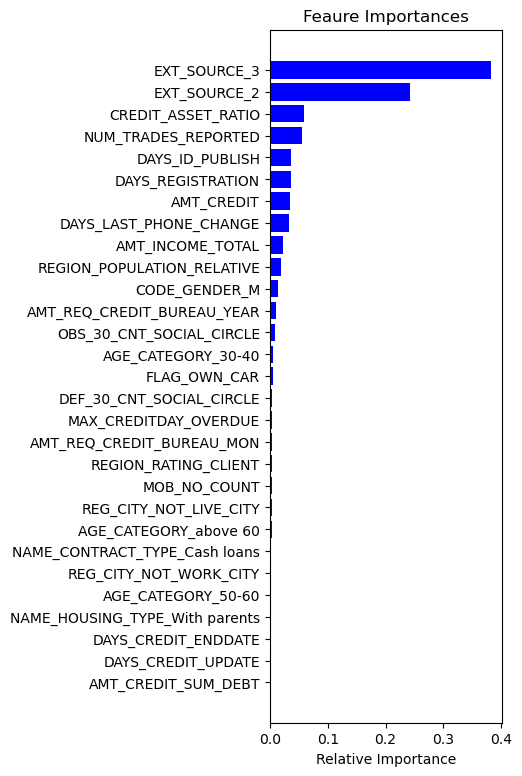

In [167]:
features = x_train.columns
importances = best_esti.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(3,9))
plt.title('Feaure Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model Performance in Train Data Set

In [119]:
print('Confusion_matrix:',confusion_matrix(y_train,y_train_pred))
print('Accuracy:',accuracy_score(y_train,y_train_pred))
print('Precision_Score:',precision_score(y_train,y_train_pred))
print('Recall Score:',recall_score(y_train,y_train_pred))
print('Classification Report:',classification_report(y_train,y_train_pred))

Confusion_matrix: [[945272    222]
 [ 77944   2289]]
Accuracy: 0.9237945379228586
Precision_Score: 0.9115890083632019
Recall Score: 0.02852940809891192
Classification Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96    945494
           1       0.91      0.03      0.06     80233

    accuracy                           0.92   1025727
   macro avg       0.92      0.51      0.51   1025727
weighted avg       0.92      0.92      0.89   1025727



### Model Performance in Test Data Set

In [120]:
print('Confusion_matrix:',confusion_matrix(y_test,y_test_pred))
print('Accuracy:',accuracy_score(y_test,y_test_pred))
print('Precision_Score:',precision_score(y_test,y_test_pred))
print('Recall Score:',recall_score(y_test,y_test_pred))
print('Classification Report:',classification_report(y_test,y_test_pred))

Confusion_matrix: [[405192    119]
 [ 33395    892]]
Accuracy: 0.9237621645230415
Precision_Score: 0.8822947576656776
Recall Score: 0.026015691078251232
Classification Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96    405311
           1       0.88      0.03      0.05     34287

    accuracy                           0.92    439598
   macro avg       0.90      0.51      0.51    439598
weighted avg       0.92      0.92      0.89    439598



- If the Model Objective is the Keep Good Customers the optimized model is good

### The Default Probability 

In [153]:
y_train_pred_prob = best_esti.predict_proba(x_train)

In [155]:
y_train_pred_final = pd.DataFrame({'TARGET':y_train.values, 'Default_Prob':y_train_pred_prob[:,1]})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final['Default_score'] = y_train_pred_final['Default_Prob']*100
y_train_pred_final.head()

TARGET  Default_Prob   CustID  Default_score
0       0          0.03  1059320           2.85
1       0          0.03   722405           3.35
2       0          0.03    30211           3.33
3       0          0.03   824019           3.02
4       0          0.03  1249128           2.57

In [156]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Default_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

TARGET   Default_Prob   CustID   Default_score  0.00  0.10  0.20  0.30  \
0        0           0.03  1059320            2.85     1     0     0     0   
1        0           0.03   722405            3.35     1     0     0     0   
2        0           0.03    30211            3.33     1     0     0     0   
3        0           0.03   824019            3.02     1     0     0     0   
4        0           0.03  1249128            2.57     1     0     0     0   

   0.40  0.50  0.60  0.70  0.80  0.90  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     0     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [157]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.TARGET,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity =cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]

print(cutoff_df)

      prob  accuracy  sensitivity  specificity
0.00  0.00      0.08         1.00         0.00
0.10  0.10      0.78         0.65         0.80
0.20  0.20      0.91         0.35         0.95
0.30  0.30      0.93         0.16         0.99
0.40  0.40      0.93         0.07         1.00
0.50  0.50      0.92         0.03         1.00
0.60  0.60      0.92         0.01         1.00
0.70  0.70      0.92         0.00         1.00
0.80  0.80      0.92         0.00         1.00
0.90  0.90      0.92         0.00         1.00


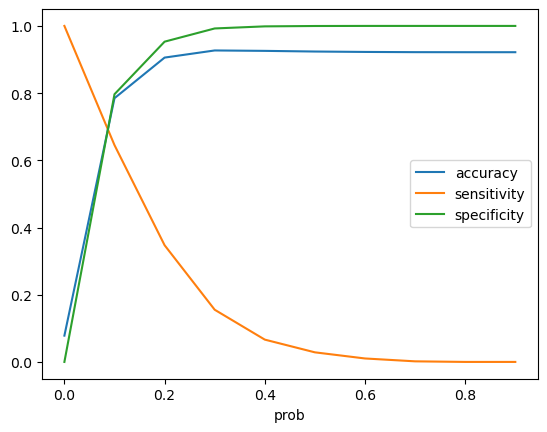

In [158]:
# Let's plot accuracy, sensitivity and specificity for varius probabilities.
cutoff_df.plot.line(x='prob', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

- If the Bank focus on Banks Business, that is they prefer to classify their non-default customers in a right way, the cut off will be 0.12

#### Best Estimated (Fine Tuned Tree) - High Precison but low Recall

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.392668 to fit



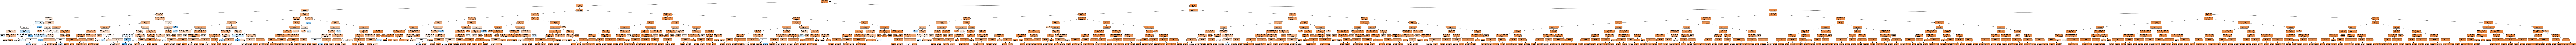

In [163]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

dot_data = StringIO()
export_graphviz(best_esti[2], out_file=dot_data,filled=True,rounded=True,feature_names=x_train.columns)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Banks Objective - Bank need to Correctly Identify the Defaulters in the Bank

- The Best Recall Score Models

In [134]:
rf1=RandomForestClassifier(criterion='gini',random_state=42,n_jobs=-1,max_depth=8,min_samples_leaf=100,min_samples_split=50,class_weight='balanced')

In [135]:
rf1.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=100, min_samples_split=50, n_jobs=-1,
                       random_state=42)

In [136]:
y_train_pred = rf1.predict(x_train)
y_test_pred = rf1.predict(x_test)

In [147]:
y_train_pred_prob=rf1.predict_proba(x_train)[:,1]
y_test_pred_prob = rf1.predict_proba(x_test)[:,1]

In [148]:
y_train_pred_prob

array([0.33516999, 0.2778253 , 0.3227607 , ..., 0.62143164, 0.73705516,
       0.40575197])

In [161]:
sample_tree2 = rf1.estimators_[5]

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.719648 to fit



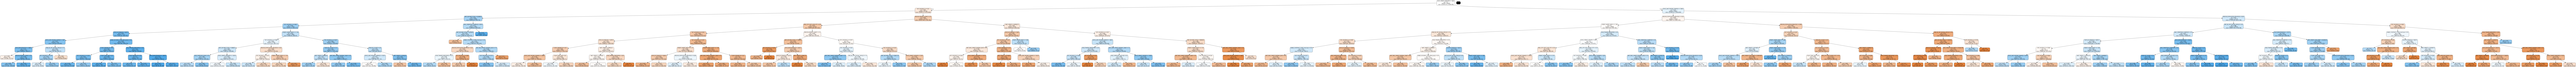

In [162]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

dot_data = StringIO()
export_graphviz(sample_tree2, out_file=dot_data,filled=True,rounded=True,feature_names=x_train.columns)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Test Performance

In [137]:
print('Confusion_matrix:',confusion_matrix(y_test,y_test_pred))
print('Accuracy:',accuracy_score(y_test,y_test_pred))
print('Precision_Score:',precision_score(y_test,y_test_pred))
print('Recall Score:',recall_score(y_test,y_test_pred))
print('Classification Report:',classification_report(y_test,y_test_pred))

Confusion_matrix: [[290893 114418]
 [ 11495  22792]]
Accuracy: 0.7135724002383996
Precision_Score: 0.1661103418118213
Recall Score: 0.6647417388514597
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.72      0.82    405311
           1       0.17      0.66      0.27     34287

    accuracy                           0.71    439598
   macro avg       0.56      0.69      0.54    439598
weighted avg       0.90      0.71      0.78    439598



### Defaulters Probability with Model Having Good Recall Score

In [149]:
y_train_pred_final = pd.DataFrame({'TARGET':y_train.values, 'Default_Prob':y_train_pred_prob})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final['Default_score'] = y_train_pred_final['Default_Prob']*100
y_train_pred_final.head()

TARGET  Default_Prob   CustID  Default_score
0       0          0.34  1059320          33.52
1       0          0.28   722405          27.78
2       0          0.32    30211          32.28
3       0          0.42   824019          41.56
4       0          0.33  1249128          32.53

In [150]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Default_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

TARGET   Default_Prob   CustID   Default_score  0.00  0.10  0.20  0.30  \
0        0           0.34  1059320           33.52     1     1     1     1   
1        0           0.28   722405           27.78     1     1     1     0   
2        0           0.32    30211           32.28     1     1     1     1   
3        0           0.42   824019           41.56     1     1     1     1   
4        0           0.33  1249128           32.53     1     1     1     1   

   0.40  0.50  0.60  0.70  0.80  0.90  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     0     0     0     0  
3     1     0     0     0     0     0  
4     0     0     0     0     0     0

In [151]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.TARGET,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity =cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]

print(cutoff_df)

      prob  accuracy  sensitivity  specificity
0.00  0.00      0.08         1.00         0.00
0.10  0.10      0.08         1.00         0.00
0.20  0.20      0.08         1.00         0.00
0.30  0.30      0.22         0.98         0.16
0.40  0.40      0.51         0.85         0.48
0.50  0.50      0.71         0.67         0.72
0.60  0.60      0.84         0.45         0.88
0.70  0.70      0.91         0.20         0.97
0.80  0.80      0.92         0.02         1.00
0.90  0.90      0.92         0.00         1.00


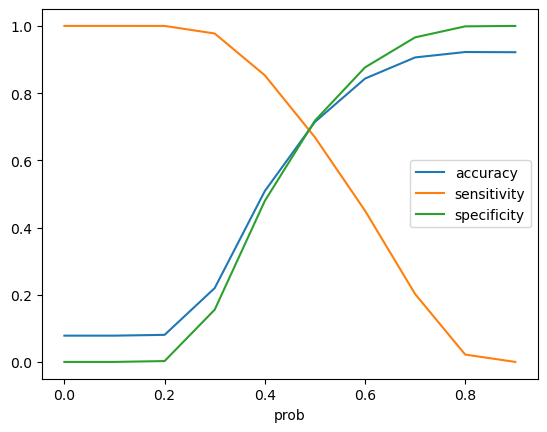

In [152]:
# Let's plot accuracy, sensitivity and specificity for varius probabilities.
cutoff_df.plot.line(x='prob', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

- The Optimal Cutoff of this model is 0.5

### Feature Importance Plot

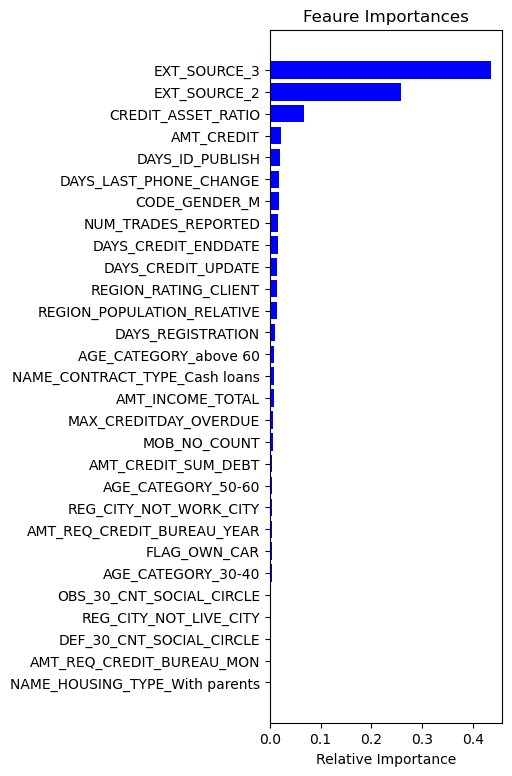

In [166]:
features = x_train.columns
importances = rf1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(3,9))
plt.title('Feaure Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Why Recall ?
- Banks prioritize identifying defaulters over wrongly rejecting some good applicants.
- Higher recall (67%) ensures fewer defaulters slip through and reduces financial risk.
- Precision trade-off is acceptable because wrongly rejected applicants can reapply with additional verification.


### Mode Evaluation 
#### Train Data:
- Precision: 0.1669 (16.69%)
- Recall: 0.6743 (67.43%)  (high recall, which is good for credit risk)
- Accuracy: 71.13%
- F1-score: 27% (due to class imbalance)
##### Test Data:
- Precision: 0.1651 (16.51%)
- Recall: 0.6684 (66.84%) 
- Accuracy: 71.04%
- F1-score: 26%


- High Recall (67%): The model correctly identifies most defaulters, reducing false negatives, which is the main goal.
- Low Precision (~16%): Many non-defaulters are flagged as defaulters (false positives), but this is acceptable in credit risk since avoiding defaulters is the priority.
- Accuracy (~71%): Acceptable given class imbalance, but not the best metric for imbalanced datasets.
